#**INTRODUCTION**

The dataset used in this work is the ***MAGIC Gamma Telescope dataset*** provided by the UCI Machine Learning Repository <a href="https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope" target="_blank">here</a>.<br><br>

<figure>
  <img src="https://cdn.eso.org/images/screen/2020-cta-paranal-comp-8k-trans-cc.jpg" width="900" height="400" hspace="0">
  
</figure><br>


**MAGIC** (Major Atmospheric Gamma Imaging Cherenkov Telescopes) is a system of two Imaging Atmospheric Cherenkov telescopes situated at La Palma, on the Canary Islands.<br>
These analysis are really important in the world of Physics, since the they provide several information to different studies.<br> In particular, the goals of the telescope are to detect and study primarily photons, coming from:

*   Accretion of black holes in active galactic nuclei;
*   Supernova remnants, due to their interest as sources of cosmic rays;
*   Other galactic sources, such as pulsar wind nebulae or X-ray binaries;
*   Unidentified EGRET or Fermi sources;
*   Gamma ray bursts;
*   Annihilation of dark matter.

<br>

**What is the Chernekov Effect?**
<br>

According to the theory of relativity, no particle can travel faster than the speed of light in a vacuum. In a dense medium, however, the phase velocity of light is lower than in vacuum, and in a medium with refractive index n it will be *c / n*. It may happen that a particle exceeds the phase velocity of light in the medium (while still remaining at the limit of *c*). If this particle is electrically charged, the Čerenkov effect occurs, i.e. the emission of γ radiation.

<br>

**Why does it happen?**
<br>

The high and very high energy gamma photons from deep space can cross our entire galaxy without problems but, once they have penetrated into the Earth's atmosphere, they are "forced" to interact with the atoms and molecules they find in their path. <br>The interaction gives rise to a swarm of particles that propagates around the direction of origin of the primary gamma photon. <br>The particles of the swarm are largely highly energetic electrons and positrons, that move faster than the speed of propagation of light in the same medium (the speed of light is a constant in vacuum but, in materials, depends on the refractive index of the medium). <br>This positive difference in speed causes the emission of a very short flash of bluish light, called Cherenkov radiation.

<br>

<br>
<figure>
  <img src="https://www.researchgate.net/profile/Oriana_Mansutti/publication/1901518/figure/fig17/AS:669021410185226@1536518542689/The-observational-technique-adopted-by-the-Imaging-Atmospheric-Cherenkov-Telescopes.ppm" width="450" height="450" hspace="0">
  <figcaption>Representation of the effect</figcaption>
</figure>

<br>

**Dataset Descriptioon**
<br>

The data are Monte Carlo generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope, using the imaging technique.<br> Cherenkov gamma telescope observes high energy gamma rays indirectly, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere.<br> This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. <br>
Finally, the photomultipliers inside the camera can collect the pulses, left by the incoming Cherenkiv photons, and render the image used for the classification purpose.<br>


<br>

In particular, each image sample is characterized by the following attributes:

*   **length**: major half axis of ellipse [mm];
*   **width**: minor half axis of ellipse [mm];
*   **size**: 10-log of sum of content of all pixels [photon count];
*   **conc2**: ratio of sum of two highest pixels over size [ratio];
*   **conc1**: ratio of brightest pixel over size [ratio];
*   **pdist**: distance from brightest pixel to center, along major axis [mm];
*   **m3long**: 3rd root of third moment along major axis [mm];
*   **m3trans**: 3rd root of third moment along minor axis [mm];
*   **alpha**: angle of major axis with vector to origin [deg];
*   **dist**: distance from origin to center of ellipse [mm].

<br>
<figure>
  <img src="https://drive.google.com/uc?export=view&id=1Exu3hX-UWXvB6qMkd6d6hSxms_N_wMKV" width="450" height="260" hspace="0">
  <figcaption><a href="https://www.sciencedirect.com/science/article/abs/pii/S0168900203025051?via%3Dihub" target="_blank">Sketch and definition of some image parameters.</a></figcaption>
</figure>
 
<br>

My task is to build a model able to understand, given the rendered image, if the shower of photons was generated by a gamma particle (*class g*) or not (*class h*).
<br>


#**LIBRARIES**


In [ ]:
import numpy as np
import pandas as pd
import requests
import csv

import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import export_graphviz
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import graphviz

from sklearn import datasets
from sklearn import preprocessing

from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import tree

!pip install chart_studio
import chart_studio.plotly as py

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from imblearn.over_sampling import SMOTE
import matplotlib.patches as mpatches

     |████████████████████████████████| 71kB 5.0MB/s 


# **DATASET**


In [ ]:
#@title #####SHOW CODE - LOAD CSV
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', sep=",", header=None)
dataset.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
               'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha','fDist','TARGET']
dataset.info()
print(f"\nNumber of missing values: {dataset.isnull().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  TARGET    19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB

Number of missing values: 0


In [ ]:
#@title #####SHOW CODE - DATASET INFO
old_len=len(dataset)
dataset = dataset.drop_duplicates(subset=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
               'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha','fDist','TARGET'], keep='first')
new_len=len(dataset)
print('\nDataset Scheme:')
print(dataset.head())

print(f'\nOld length with duplicated rows: {old_len}, New length with unique rows: {new_len}')



Dataset Scheme:
    fLength    fWidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  TARGET
0   28.7967   16.0021  2.6449  0.3918  ...   -8.2027  40.0920   81.8828       g
1   31.6036   11.7235  2.5185  0.5303  ...   -9.9574   6.3609  205.2610       g
2  162.0520  136.0310  4.0612  0.0374  ...  -45.2160  76.9600  256.7880       g
3   23.8172    9.5728  2.3385  0.6147  ...   -7.1513  10.4490  116.7370       g
4   75.1362   30.9205  3.1611  0.3168  ...   21.8393   4.6480  356.4620       g

[5 rows x 11 columns]

Old length with duplicated rows: 19020, New length with unique rows: 18905


The dataset is loaded as a Pandas Dataframe. The column names are then added: they refer to the ones cited in the above section.

The original size of the dataset is 19020 samples. However, by removing the duplicated rows, if any, with the .drop_duplicates() method, I generate a new Dataframe made of 18905 entries and 11 attributes, included the target.


We can see that there are no missing values. All the attributes are float. The class label is the attribute *TARGET* and it is a binary variable that can only assume two values:
* **g** if it is a gamma signal;
* **h** if it is background.

## *Some statistics of data*
*   **count**: the number of samples having a non-null value for that feature;
*   **mean**: the average value of the corresponding feature;
*   **std**: the standard deviation of each feature;
*   **min**: the minimum value of the corresponding feature in the dataset;
*   **max**: the maximum value of the corresponding feature in the dataset;
*   **25%, 50%, 75%** quartiles: they are cut points which divide the samples into four equal groups more or less, after having ordered them according to a specific feature.


## *Focus on quartiles*

They provide information about the center and the spread of the data. Knowing the lower and upper quartile provides information on how big the spread is, and if the dataset is skewed toward one side. Besides, if we have a cumulative distribution function, we can find the quartiles in this way:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/NormalCDFQuartile3.svg/768px-NormalCDFQuartile3.svg.png" width="500" height="400" hspace="50"><figcaption>Quartiles on a cumulative distribution function of a normal distribution</figcaption>

In [ ]:
#@title #####SHOW CODE - DATASET STATS
dataset.describe()

fLength        fWidth  ...        fAlpha         fDist
count  18905.000000  18905.000000  ...  18905.000000  18905.000000
mean      53.161416     22.145872  ...     27.551644    193.712554
std       42.259789     18.300664  ...     26.083055     74.685712
min        4.283500      0.000000  ...      0.000000      1.282600
25%       24.359700     11.874200  ...      5.516400    142.269000
50%       37.129500     17.143800  ...     17.533000    191.832000
75%       69.975400     24.712400  ...     45.704000    240.409000
max      334.177000    256.382000  ...     90.000000    495.561000

[8 rows x 10 columns]

#**DATA EXPLORATION**

Data exploration is the first step in data analysis to be done: it helps to understand the main trends and major points to study in greater detail. <br>
This process usually uses visual exploration to understand what is in a dataset and the characteristics of the data. In general, it makes clearer future analysis, like the interpretation of the results and which kind of workflow to follow between the several algorithms: indeed an algorithm which works properly on a dataset it is not supposed to work well on another dataset too.<br>
The last step to apply, before the extraction and/or the manipulation of the features, is the "***Data Quality***" procedure: data are pruned or refined by removing unusable parts of the data (data cleansing), correcting poorly formatted elements and defining relevant relationships across datasets.


## *Features distribution*

Lets start with the sample distribution of each feature in the dataset regardless of classes.


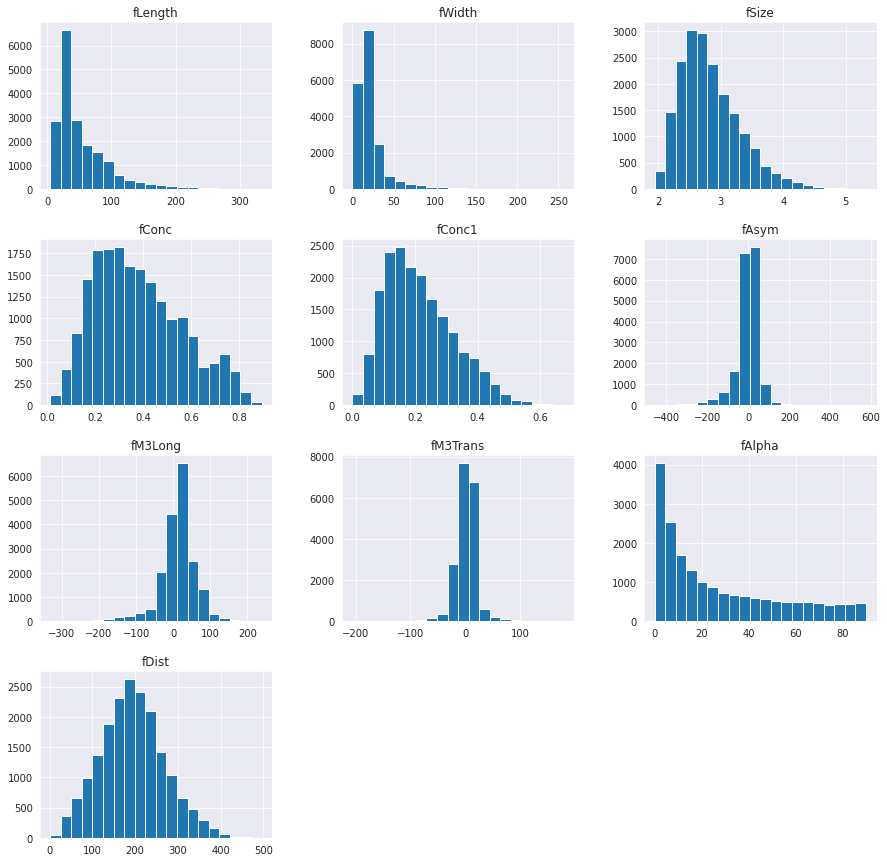

In [ ]:
#@title #####SHOW CODE - FEATURES DISTRIBUTION
with sns.axes_style("darkgrid"):
  pd.DataFrame.hist(dataset, figsize = [15,15], bins=20)
  plt.show()

From these plots we can see how each each feature follow a different distribution and how the ranges are really different. <br>
About the distribution, we'll see some considerations just after this section, when we'll talk about outliers and ***Boxplot***.<br>
Before we have to talk about the normalization step, also essential for the outliers detecion.
As I said before, different features have different spreads in different ranges, so an important preprocessing step is feature rescaling or data standardization. <br>
This procedure is really important, because it's crucial that the algorithms are **not** affected by the magnitude of the features considered: without this step the algorithms would be biased towards feature with higher magnitude.<br>
This can be seen for example with KNN and SVM, which relies on distances between data points, or with Principal Component Analysis that is interested in the features that maximize the variance, so the scale of the attributes must be the same. <br>
So, the main advantage of doing this is to avoid attributes in greater numeric ranges, dominating those in smaller numeric ranges and, moreover, it makes calculation easier, especially when using a kernel approach. Besides, in general, standardization ensures quick convergence of optimization alghoritms, used to build some classifiers.


## *Target distribution*

Here the visualitazion of the binary target variable distribution: there are 12288 gamma samples(65%) and 6617 background samples(35%).

So, the dataset is quite imbalanced. In order to mitigate it, an oversampling method may be handy, due to to build a classifier that is not biased towards the majority class.

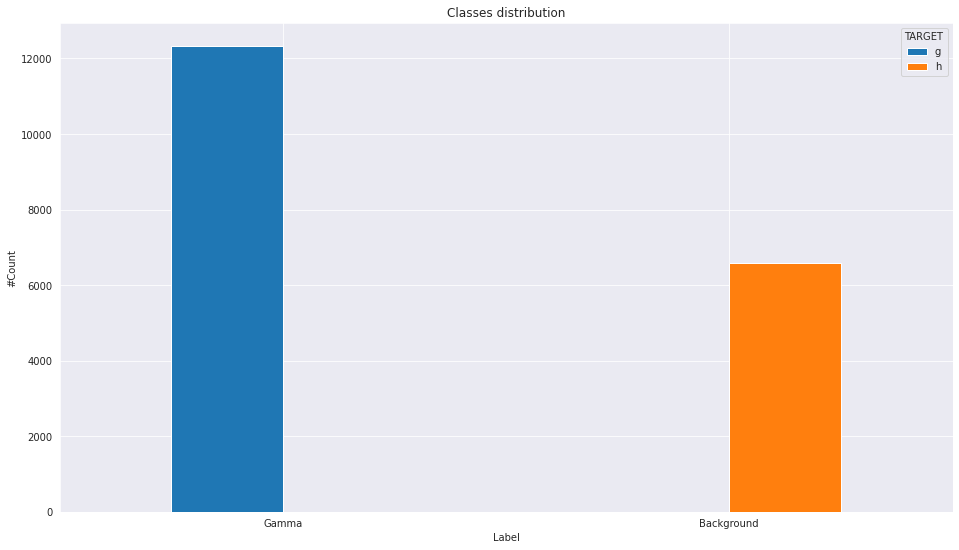

In [ ]:
#@title #####SHOW CODE - TARGET DISTRIBUTION
with sns.axes_style("darkgrid"):
  size = len(dataset.columns)
  val='TARGET'
  pd.crosstab(dataset[val],dataset.TARGET).plot(kind="bar",figsize=(16,9) )
  plt.title('Classes distribution')
  plt.xticks(np.arange(2), ('Gamma', 'Background'))
  plt.xticks(rotation=360)
  plt.xlabel('Label')
  plt.ylabel('#Count')
  plt.show()


## *Standardization*

As anticipaced on the section about the features distribution, since the variability of the features differs a lot from one another, a data standardization phase is needed. In particular, I decided to use **z-score normalization**.<br>
The features are rescaled, such that they follow a standard normal distribution.

$ z= \frac{x-\mu}{\sigma}$  
with mean $\mu = \frac{1}{n}\sum_i^nx_i$ and variance $\sigma = \sqrt{\frac{\sum_{i=1}^n(x_i-{\mu})^2}{n}}$

<br>


To give an example of its behavior, standardization here is performed on all the dataset: the model will be fitted later **only** on with the train dataset.

In [ ]:
#@title ##### Mean and Std Deviation of dataset before Standardization 

dataset.describe().loc[['mean','std'],:]

fLength     fWidth     fSize  ...   fM3Trans     fAlpha       fDist
mean  53.161416  22.145872  2.824643  ...   0.259364  27.551644  193.712554
std   42.259789  18.300664  0.472377  ...  20.775268  26.083055   74.685712

[2 rows x 10 columns]

In [ ]:
#@title ##### Mean and Std Deviation of dataset after Standardization 

scaler = StandardScaler()

#create a copy of the original dataset
dataset_std = dataset.copy()

#fit + transform
scaler.fit(dataset[dataset.columns.values[:-1]])
dataset_std[dataset_std.columns.values[:-1]] = scaler.transform(dataset_std[dataset_std.columns.values[:-1]], copy=True)


dataset_std.describe().loc[['mean','std'],:]


fLength        fWidth  ...        fAlpha         fDist
mean  5.849152e-16  6.233575e-16  ...  7.206143e-16 -3.011608e-16
std   1.000026e+00  1.000026e+00  ...  1.000026e+00  1.000026e+00

[2 rows x 10 columns]

## *Boxplots*


A boxplot is a method for graphically depicting groups of numerical data through their quartiles. In this way, I can also have an indication about outliers, if there are points outside the range *[min,max]* shown below, and about simmetry, by taking into consideration the position of the median, with respect to the two whiskers.

<br>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/825px-Boxplot_vs_PDF.svg.png" width="550" height="600" hspace="50">




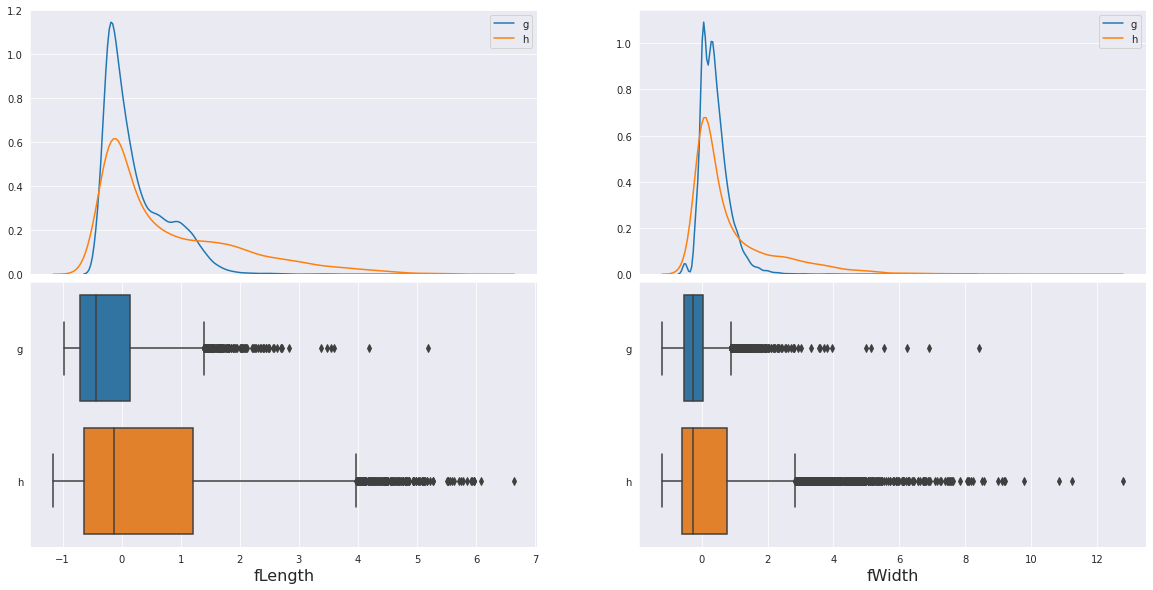

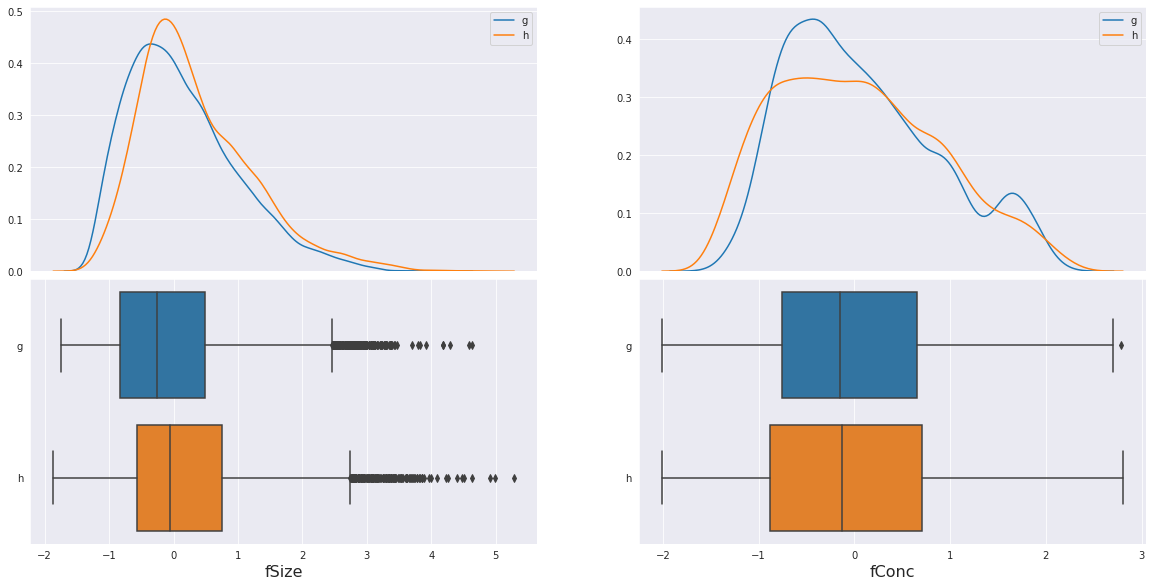

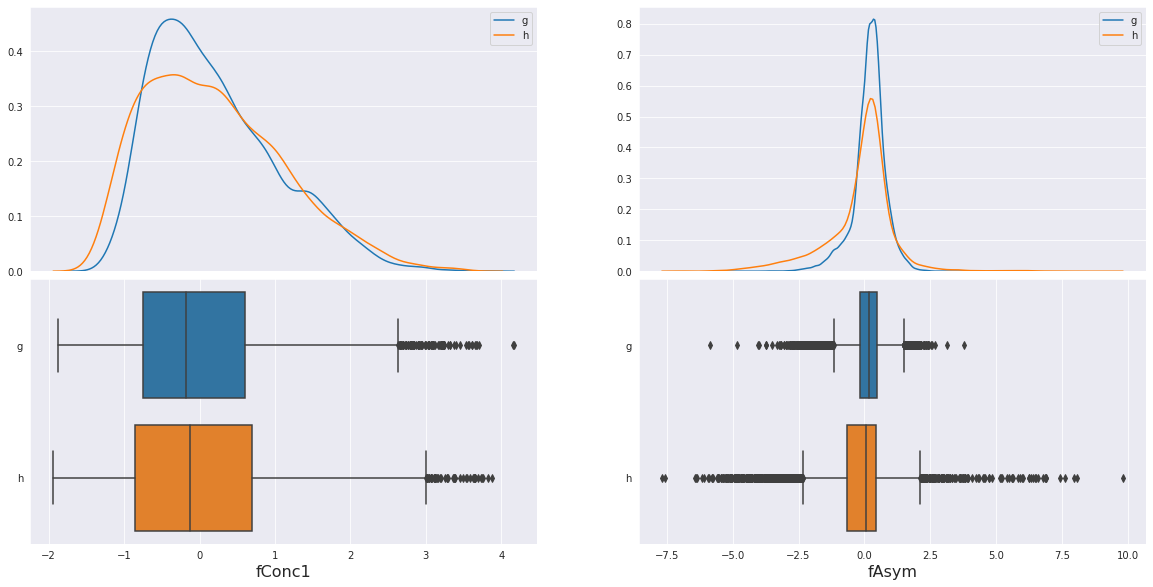

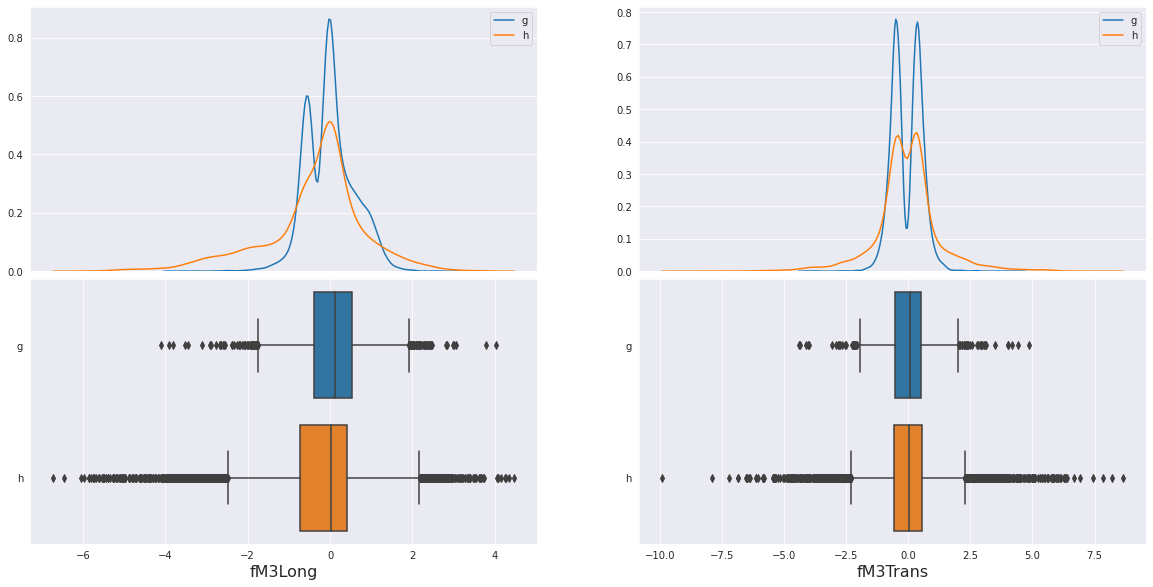

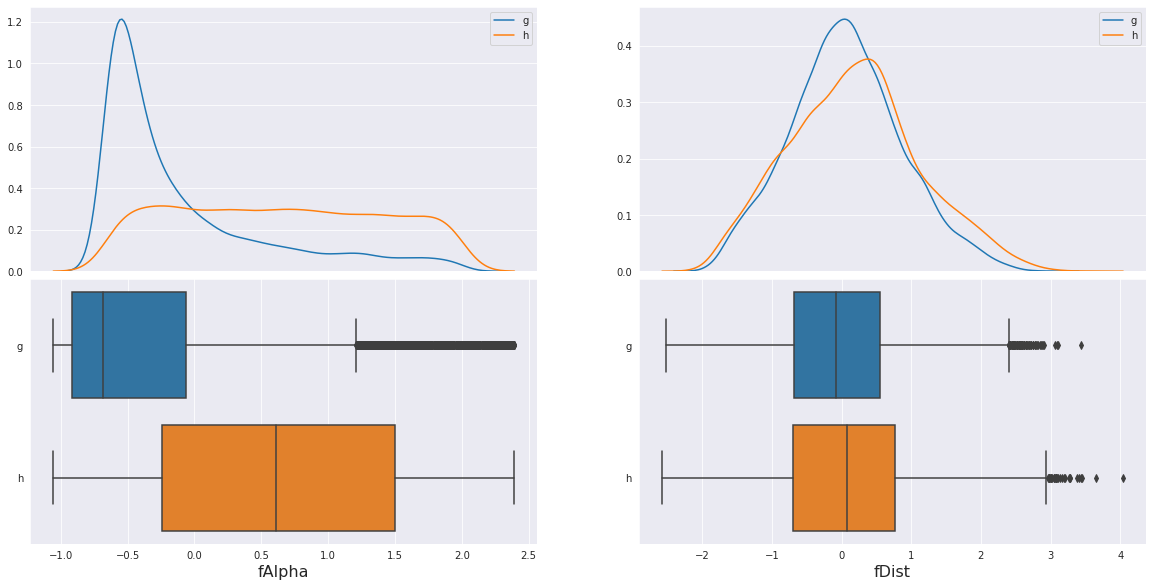

In [ ]:
#@title #####SHOW CODE - BOXPLOT
dataset=dataset_std
features=dataset.columns[:-1]

with sns.axes_style("darkgrid"):
  
  for i,feat in enumerate(features):
    if i%2==0:
      plt.figure(figsize=(20,50))
      j=2*i+1
      ax1=plt.subplot(10,2,j)
      sns.kdeplot(dataset[feat][dataset.TARGET=='g'],ax=ax1,label='g')        
      sns.kdeplot(dataset[feat][dataset.TARGET=='h'],ax=ax1,label='h')
      ax2=plt.subplot(10,2,j+2)
      sns.boxplot(data=dataset, x=dataset[feat], y="TARGET",ax=ax2)
      ax1.yaxis.label.set_visible(False)
      ax2.yaxis.label.set_visible(False)
      ax1.xaxis.set_visible(False)
      ax2.set_xlabel(feat,fontsize=16)
      ax1.legend()
    else:
      j=2*i
      ax1=plt.subplot(10,2,j)
      sns.kdeplot(dataset[feat][dataset.TARGET=='g'],ax=ax1,label='g')        
      sns.kdeplot(dataset[feat][dataset.TARGET=='h'],ax=ax1,label='h')
      ax2=plt.subplot(10,2,j+2)
      sns.boxplot(data=dataset, x=dataset[feat], y="TARGET",ax=ax2)
      ax1.yaxis.label.set_visible(False)
      ax2.yaxis.label.set_visible(False)
      ax1.xaxis.set_visible(False)
      ax2.set_xlabel(feat,fontsize=16)
      ax1.legend()
      plt.subplots_adjust(wspace=0.2, hspace=0.03)
      plt.show()
    #ax1.set_aspect('equal')
  #plt.subplots_adjust(wspace=0, hspace=0)
  #plt.show()

From these plots it's possible to see how for all the features, excepted fAlpha, the distributions with respect to the target are always overlapping, and this means that in this context there is not any noteworthy feature that would separate the two classes better than other features.<br>
About outliers, all the features, excluded fConc, have a lot of possible outliers, however are quite continuous in the tails so I can look at them not as erroneous records, but as rarer observations that still carry some information.

## *Correlation Matrix*


A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable X in the table is correlated with each of the other values in the table Y. In this analysis, I'm going to use
the **Pearson correlation coefficient**, which is a statistic that measures the <u>linear</u> correlation. It is important to say that this coefficient is not able  to tell the difference between dependent variables and independent variables, so in general it's important that the researcher is aware about the meaning of the variables.

<br>



<h2><i>Definition for populations</i></h2>

*   Given two random variables <i>(X,Y)</i> it is defined as  $\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_X\sigma_Y}$ where $cov$ is the covariance and $\sigma$ indicates the standard deviation;<br>
Recall that $cov(X,Y) = \mathbb{E}[(X-\mu_X)(Y-\mu_Y)]$, the formula can be written as: $\quad$ ${\rho}_{X,Y} = \frac{\mathbb{E}[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}$

<h2><i>Definition for samples</i></h2>

*   Pearson's correlation coefficient, when applied to a sample $\{(x_1,y_1),..,(x_n,y_n)\}$, is commonly represented by $r_{xy}$. The formula is obtained by substituting estimates of the covariances and variances based on a sample into the formula above. So, if we rewrite the formula with this sobstitution, $r_{xy}$ is defined as: ${\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$;<br>
where ${\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}$ is the sample mean and $n$ is the sample size


<h2><i>Interpretation</i></h2>

*   The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which $Y$ increases as $X$ increases. A value of −1 implies that all data points lie on a line for which $Y$ decreases as $X$ increases. A value of 0 implies that there is no linear correlation between the variables.<br>
More generally, note that $(X_{i} − {\bar {X}})(Y_{i} − {\bar {Y}})$ is positive if and only if $X_{i}$ and $Y_{i}$ lie on the same side of their respective means. Thus the correlation coefficient is positive if $X_{i}$  and $Y_{i}$  tend to be simultaneously greater than, or simultaneously less than, their respective means. The correlation coefficient is negative (anti-correlation) if $X_{i}$ and $Y_{i}$ tend to lie on opposite sides of their respective means. Moreover, the stronger is either tendency, the larger is the absolute value of the correlation coefficient.

The image below help us better understand that the correlation reflects the strength and the direction of a linear relationship (top row), but not the slope of that relationship (middle rpw), nor many aspects of nonlinear relationships (bottom row). Besides, notice that the figure in the center has a slope of 0, but in that case the correlation coefficient is undefined because the variance of <i>Y</i> is zero.

<br>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png" width="800" height="400" hspace="50">


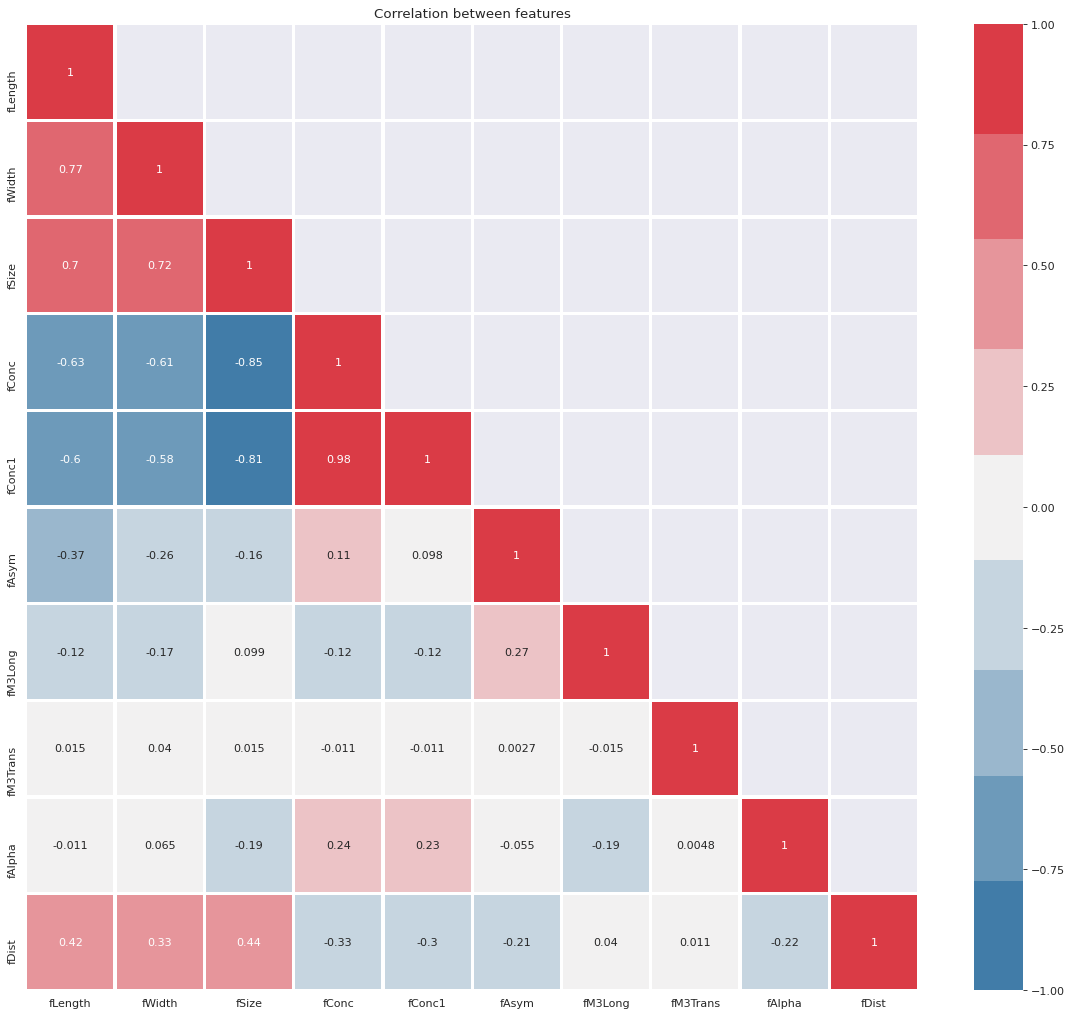

In [ ]:
#@title ###### SHOW CODE - CORRELATION MATRIX
with sns.axes_style("darkgrid"):
  corr = dataset.corr(method='pearson')
  mask = np.triu(np.ones_like(corr, dtype=bool),k=1)
  plt.figure(figsize=(18,16), dpi=80)
  cmap=sns.diverging_palette(240, 10, n=9)
  sns.heatmap(corr,annot=True,mask=mask,
              cmap=cmap,
              linewidth=2,edgecolor="k",
              #square=True
              vmin=-1,vmax=1,center=0
              )
  plt.title("Correlation between features")
  plt.show()

The line of  1 's going from the top left to the bottom right is the main diagonal, which shows that each variable always perfectly correlates with itself. Since the matrix is symmetrical, I decide to show only the results below the diagonal.

From the matrix can be stated:

* most of the features are poorely correlated;

* *fSize*, *fWidth* and *fLenght* have a really good positive correlation. This is reasonable, since are features concerning the size of the image;

* *fConc* and *fConc1* are highly negative correlation with *fSize*. This is also rational, since greater value for *fSize* brings smaller value to the other two features, because they are defined as a ratio with *fSize* in the denominator;

* *fConc* and *fConc1* have a really high correlation. From the analysis of the dataset, this behaviour is expected since they represent respectively the "ratio of sum of two highest pixels over fSize" and the "ratio of highest pixel over fSize", and so one is almost the double of the other. For this reason, one of them can be removed and, in particular, I decide to delete *fConc1*;


## *Pair Plot*

Finally, for the last Data Exploration analysis there is the Pair Plot. It is a really simple way to visualize relationships between each variable.<br>
Here I want to underline and see better all the thoughts done with the Correlation Matrix exploration.<br>
 So, the following plot shows the relationships between two variables. In particular, blue color is used for class *g* while green is used for class *h*.

In [ ]:
#@title #####SHOW CODE - PAIR PLOT
tmp=dataset['TARGET']
l=[]
for el in tmp:
  if el=='g':
    l.append('blue')
  else:
    l.append('green')
index_vals = dataset['TARGET'].astype('category').cat.codes
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='fLength',
                                 values=dataset['fLength']),
                            dict(label='fWidth',
                                 values=dataset['fWidth']),
                            dict(label='fSize',
                                 values=dataset['fSize']),
                            dict(label='fConc',
                                 values=dataset['fConc']),
                            dict(label='fConc1',
                                 values=dataset['fConc1']),
                            dict(label='fAsym',
                                 values=dataset['fAsym']),
                            dict(label='fM3Long',
                                 values=dataset['fM3Long']),
                            dict(label='fM3Trans',
                                 values=dataset['fM3Trans']),
                            dict(label='fAlpha',
                                 values=dataset['fAlpha']),
                            dict(label='fDist',
                                 values=dataset['fDist']),],
                showupperhalf=False, 
                text=dataset['TARGET'],
                marker=dict(color=l,
                            size=1,
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0)
                ))

fig.update_layout(
    title="Pair Plot",
    width=1400,
    height=1400,
)

fig.show()

In [ ]:
#@title #####SHOW CODE - DROP fConc1
dataset=dataset.drop(columns="fConc1")

#**PRINCIPAL COMPONENT ANALYSIS**

Dimensionality reduction is the process of taking data in a high dimensional space and mapping it into a new space, whose dimensionality is much smaller. As anticipated in the section of the *Features distribution*, the reduction of dimensionality is important to minimize the computational effort, to avoid poor generalization abilities of the learning algorithms and to better interpretate the data.<br>
One of the main algorithm of dimensionality reduction is ***Principal Component Analysis***.<br>


## *What is PCA?*

First of all, PCA is an unsupervides learning algorithm used to extract features by performing a change of basis on the data.
More in detail, it is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables, called principal components.<br>
This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.<br>
The resulting vector are defined as a set of uncorrelated orthogonal basis, that maximize the variance of the projected data.
<br>
<figure>
  <img src=https://miro.medium.com/max/875/1*V3JWBvxB92Uo116Bpxa3Tw.png width="850" height="400" hspace="0">
  <figcaption>On the left the orignal data, on the right the data on the space defined by the principal components</figcaption>
</figure>

## *Main Problem*

Let $x_1,...,x_m$ be a $m$ vector in $R^d$, we would like to reduce the dimensionality of these vectors, using a linear transformation. A matrix $W$ in $R^{n,d}$, where ${n<d}$, map $x$ to a lower dimensionality representation $Wx$. A second matrix $U$ in $R^{d,n}$ is used instead to bring back each vector $x$ to the original dimensionality.<br>
We can define $y=Wx$ as the vector in the low dimensional space and ${\bar{x}=Uy}$ as the reconstrunced vector, so our gol is to find $W$ and $U$, such that the total squared distance between $x$ and ${\bar{x}}$ is minimal.<br>
Given $(U,W)$ as the solution, with $U$ made by orthonormal columns and with $W=U^T$, and by then simplifying the optimization problem, we can reconduct the problem to the maximization of the $trace(U^Txx^TU)$.<br>
So, we define $A=XX^T$ as symmetric positive semidefinite matrix, that can be written in is spectral decomposition as $VDV^T$, where $D$ is a diagonal matrix with the positive eigenvalues of $A$ and $V$ is the matrix which columns are the corresponding eigenvector.<br>
So, the final solution is the matrix $U$, whose columns are the $n$ eigenvectors of $A$ corrisponding to the largest $n$ eigenvalues.<br>

## *Covariance Method*


Given a matrix $X$ of dimension $n$ x $p$:
*   **Subtract the Mean**: taken the data, we have to subtract the mean from each of the data dimensions, where the mean subtracted is the average across each dimension. In this way is obtained a dataset whose mean is zero.<br>
Mean of dimension $j$: $u_j={\frac {1}{n}}\sum _{i=1}^{n}X_{i,j}$<br>
Mean-subtracted data: $B=X-hu^T$ where $h$ is a $n$ x $1$ column vector of all 1s<br>

*   **Calculate the covariance matrix**: compute the symmentric covariance matrix from the data.<br>
Covariance matrix $C$ of dimension $p$ x $p$: $C={\frac {1}{n-1}}BB^T$<br>

*    **Calculate the eigenvectors and eigenvalues of the covariance matrix**: since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. They provide us with information about the patterns in the data.<br>
Compure the matrix $V$ of othogonal eigenvectors which diagonalizes $C$: $V^{-1}CV=D$, where $D$ is the diagonal matrix of eigeenvalues of $C$

*   **Choosing Components**: the eigenvector with the highest eigenvalue is the principle component of the data set. In general, once eigenvectors are found from the covariance matrix, the next step
is to order them by eigenvalue, highest to lowest. This gives you the components in
order of significance. If you leave out some components, the final data set will have less
dimensions than the original. To be precise, if you originally have $n$ dimensions in
your data, and so you calculate $n$ eigenvectors and eigenvalues, and then you choose
only the first $p$ eigenvectors, then the final data set has only $p$ dimensions.



## *Choice of the Principal Components*

The last step to do is to decide how many pricipal components we want to keep. Reminding that the variance in the direction of the k-th principal
component is given by the corresponding singular
value $\lambda_k$, each singular values can be used to estimate how many components to keep. In particular, we usally keep the components the explain at least the 85% of the variation.<br>
$PVE: \frac{\sum_{i=1}^k \lambda_j}{\sum_{i=1}^n \lambda_j}=0.85$<br>
In order to calculate this, we start from the orderder components by its own PVE: $\frac{\lambda_i}{\sum_{i=1}^n \lambda_j}$ and we plot the cumulative PVE: we will keep features until we reach the desidered threshold in the graph.
<br>
<br>
The following plot is obtained with the $Covariance$ $Method$:

In [ ]:
#@title #####SHOW CODE - PVE
X=dataset.iloc[:,0:9].values
y=dataset.iloc[:,9].values
U = np.mean(X, axis=0)
B = X - U
C = np.cov(B.T)
eig_vals, eig_vecs = np.linalg.eig(C)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

fig = go.Figure()

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,11)],
    y=var_exp,
    text=np.round(var_exp,decimals=2),
    textposition='auto',
    name='Individual',
    marker=dict(color='midnightblue')
)
trace2=go.Scatter(
    x=['PC %s' %i for i in range(1,11)], 
                 y=np.ones(9)*85,
                  mode='lines',
                  name='PVE Threshold',
                  text=85,
                  textposition='middle left',)

textPVE=["38.92", "55.7", "66.86", "77.64", "85.54", "92.6", "96.21", "98.62", "100.0"]
trace3 = go.Scatter(
    x=['PC %s' %i for i in range(1,11)], 
    y=cum_var_exp,
    name='Cumulative',
    text=textPVE,
    textposition='top left',
    line=dict(color='green')
)
for i in range(9):
  fig.add_annotation(x=i-0.1, 
            y=float(textPVE[i])+4,
            text=textPVE[i],
            showarrow=False,
            #arrowhead=1
            )
fig.add_annotation(x=0, 
                   y=89,
            text="85",
            showarrow=False,
            #arrowhead=1
            )


fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)

fig.update_layout(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance %'
    ),
    
)

fig.show()

As it can be seen from the plot, we achieve the 85% of the PVE for $n\_{components}=5$. So I proceed by compunting the PCA with 5 principal components and then by transforming my data.

In [ ]:
#@title #####SHOW CODE - PCA
pca = PCA(n_components=5)
dataset_pca=dataset.copy()
no_target = dataset_pca.drop('TARGET', axis=1)
pca.fit(no_target)
dataset_PCA = pca.transform(no_target)
df_pca = pd.DataFrame(data=dataset_PCA, columns=["PC1", "PC2","PC3","PC4","PC5"])

print(f"Shape of the dataset after PCA is {dataset_PCA.shape}")



Shape of the dataset after PCA is (18905, 5)


Below there are the 2D and 3D plots of the data projected. It is clearly visible that the data are not well separated inside a bi/tri-dimensional space, so it's not possible to make any assumption about the possible performance of the algorithms.

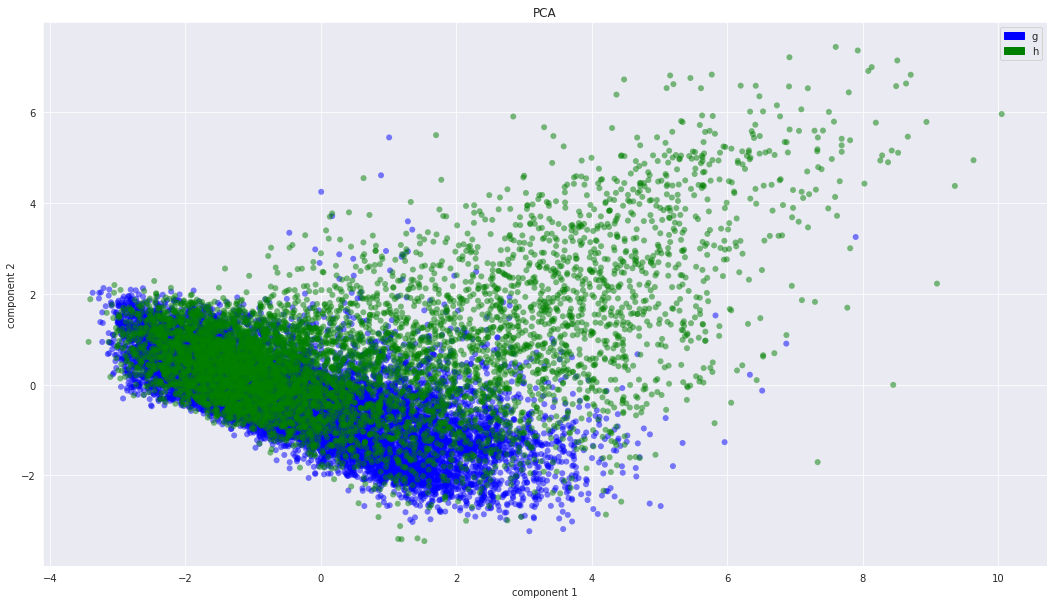

In [ ]:
#@title #####SHOW CODE - PCA 2D PLOT
tmp=dataset['TARGET']
l=[]
for el in tmp:
  if el=='g':
    l.append('blue')
  else:
    l.append('green')

with sns.axes_style("darkgrid"):
  plt.figure(figsize=(18,10))
  plot=plt.scatter(dataset_PCA[:, 0], dataset_PCA[:, 1],
                edgecolor='none', 
                c=l,
                alpha=0.5,
                cmap=plt.cm.nipy_spectral,
              )
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  g_patch = mpatches.Patch(color='green', label='h')
  b_patch = mpatches.Patch(color='blue', label='g')
  plt.legend(handles=[b_patch,g_patch])
  plt.title("PCA")

In [ ]:
#@title #####SHOW CODE - PCA 3D PLOT
df_3d_pca = df_pca[["PC1","PC2","PC3"]]

arr=[]
for a in dataset['TARGET']:
  if a=='g':
    arr.append("blue")
  else:
    arr.append("green")

fig = go.Figure(data=[go.Scatter3d(
    x=df_3d_pca['PC1'],
    y=df_3d_pca['PC2'],
    z=df_3d_pca['PC3'],
    mode='markers',
    marker=dict(
        size=1.2,
        color=arr,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    ),
)], )

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
    title='PCA - 3D Plot',
    yaxis=dict(
        title='PC2'
    ),
    xaxis=dict(
        title='PC1'
    ),

    )
fig.show()

PCA generates 5 new features which are uncorrelated and this is clearly evident if we take a look at the correlation matrix:

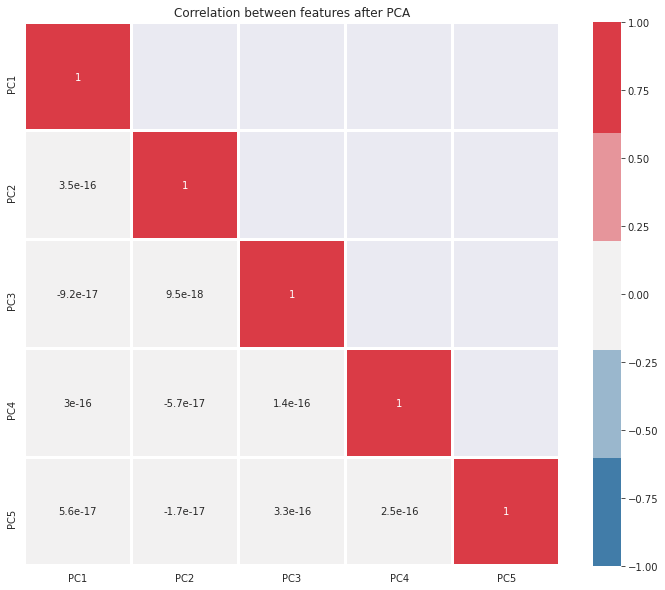

In [ ]:
#@title #####SHOW CODE - PCA CORRELATION MATRIX
with sns.axes_style("darkgrid"):
  cmap=sns.diverging_palette(240, 10, n=5)
  corr = df_pca.corr(method='pearson')
  mask = np.triu(np.ones_like(corr, dtype=bool),k=1)
  plt.figure(figsize=(12,10))
  sns.heatmap(corr,annot=True,mask=mask,
              cmap=cmap,
              linewidth=2,edgecolor="k",
              #square=True
              vmin=-1,vmax=1,center=0)
  plt.title("Correlation between features after PCA")
  plt.show()

#**OVERSAMPLING**

At this point we have seen from the *Target Distribution* section how the dataset is unbalanced: 65% are gamma samples and 35% are background.
In this situation the minority class could be harder to predict because the classification model would be biased toward the majority class.<br>
Here comes handy the technique called *Synthetic Minority Over-sampling Technique* or just $SMOTE$.<br>
This approach over-sample the minority class by creating “synthetic” examples rather than by over-sampling with replacement, that could lead to overfitting.
<br>
<figure>
  <img src=https://miro.medium.com/max/875/1*GJY7UnJ4WCzqgtrfkCvkdA.png width="800" height="400" >
</figure>
<br>

More in detail, $SMOTE$ first selects a minority class instance $a$ at random and finds its $k$ nearest minority class neighbors. The synthetic instance is then created by choosing one of the $k$ nearest neighbors $b$ at random and connecting $a$ and $b$ to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances $a$ and $b$, i.e, since are only two points, the new istance is created between them.

<br>
<figure>
  <img src=https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png width="800" height="400" hspace="0">
  <figcaption></figcaption>
</figure>
<br>



# **BUILDING THE MODELS**

The dataset is split into training and test set with a proportion 70:30.<br>
After all the feature selection process done before, a $K$-$fold$ $Cross$-$Validation$ is performed with the following models:
* K Nearest Neighbors
* SVC with linear kernel
* SVC with RBF kernel
* Decision Trees
* Random Forest
* Logistic Regression

<br>

In particular, each model is fitted on different versions of the dataset:
* Standardized dataset
* Standardized dataset + $PCA(k=5)$
* Standardized dataset + $SMOTE$
* Standardized dataset + $PCA(k=5)$ + $SMOTE$

In [ ]:
#@title #####SHOW CODE - SPLIT TRAIN TEST
print("Standard Dataset")
X=dataset.iloc[:,0:9].values
y=dataset.iloc[:,9].values
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

print("PCA Dataset")
X_pca=df_pca.values
y_pca=dataset.iloc[:,9].values
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(X_pca, y_pca, test_size=0.30, stratify=y_pca, random_state=42)
print(X_train_pca.shape,y_train_pca.shape,X_test_pca.shape,y_test_pca.shape)


Standard Dataset
(13233, 9) (13233,) (5672, 9) (5672,)
PCA Dataset
(13233, 5) (13233,) (5672, 5) (5672,)


## *Metrics*

Let's define the metrics that will be used to evaluate the performances of every model built.<br>
It's worth to underline that this measures are obtained on the inner $Validation$ $Set$, to choose the best model for each classification algorithm and on the $Test$ $Set$ to measure the final quality.

<h2><i>Confusion Matrix</i></h2>

This matrix has dimensions $2x2$ in a binary classification problem like this one, and the values in each cell represent the following measures:

*   true positives (TP): the number of times the model has predicted $Positive$ and the label was $Positive$ indeed;
*   true negatives (TN): the number of times the model has predicted $Negative$ and the label was $Negative$ indeed;
*   false positives (FP): the number of times the model has predicted $Positive$ but the label was $Negative$;
*   false negatives (FN): the number of times the model has predicted $Negative$ but the label was $Positive$;

<img src="https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png" width="650" height="450" hspace="50">


<h2><i>Accuracy</i></h2>

It indicates how often the classifier is in general correct.<br>
$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

<h2><i>Precision</i></h2>

It tells us how often the classifier is correct when it predicts $Positive$.<br>
$precision=\frac{TP}{TP+FP}$.

<h2><i>Recall</i></h2>

It measures of how capable the classifier is to identify $Positive$ samples among all the existing ones.<br>
$recall=\frac{TP}{TP+FN}$.

<h2><i>f1-score</i></h2>

It is defined as the harmonic mean between $recall$ and $precision$: $f1$-$score=2\frac{recall*precision}{recall+precision}$.<br> This measure increases with both recall and precision.


##*Cross Validation*

When a model is trained and than validated, the common way of divide the data in the two splits of $Train$ $Set$ and $Validation$ $Set$ is not always very reliable, since the accuracy obtained from the validation set could depend too much on the way the split of the labelled data is done.
A possible solution is provided by the <b>K-Fold Cross Validation</b> technique. <br>
In this approach, called $K$-$fold$ $CV$, the training set is split into $k$ smaller sets. The following procedure is followed for each of the $k$ *“folds”*:

*   a model is trained using $k-1$ of the folds as training data;
*   the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The final performance measure reported by $K$-$fold$ $CV$ is then the average of the values obtained from the $k$ results computed on each $Validation$ $Fold$. This approach can be computationally expensive, but, as said before, does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems where the number of samples is very small.<br>
In this way, we can choose the best configuration of hyperparameters, according to those averaged measures.<br>
Besides, when the algorithm treated has more than one hyperparameter, the configurations of hyperparameters tested are generated by means of a grid search.<br>
Important is to specify the <b>stratified</b> parameter on the $K$-$fold$, in order to be sure that the distributions of the two classes inside the folds are equivalent to the distributions in the original dataset.

<br>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600" height="450" hspace="50">
<br>

Once the best configuration of hyperparameters has been found, the model is retrained on all the folds, so without making any distinction between $Validation$ $Set$ and $Train$ $Set$  in order to have all samples available for this final training process.<br>
Then, this final model is tested on the $Test$ $Set$ portion of data that is **not** used inside the $K$-$fold$ $CV$ phase, since this set plays the role of totally unseen data.

<br>
<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="600" height="450" hspace="50">
 


##*Cross Validation + SMOTE*

An important thing to say about each model built with the cross-validation, is that the $SMOTE$ must be applied only on the training set adopted in each cross-validation iteration, without affecting the remaining validation fold.<br> 
This can be explained with a really simple example: consider the simplest method of over-sampling of copying the data point, where each data point from the minority class is copied 6 times before making the splits. If we did a 3-fold validation, each fold has (on average) 2 copies of each point, and this mean that if the classifier overfits by memorizing its training set, it should be able to get a perfect score on the validation set, so the cross-validation will choose the model that overfits the most.<br>
For an anologue reason, $SMOTE$ is not applied on the test set since the main goal is to see which kind of performances the model will have on unseen real data having an unbalanced distribution.

<br>
<img src="https://i.stack.imgur.com/L0p6c.png" width="600" height="450" hspace="50">

# **KNN**

The **K-Nearest Neighbors** algorithm is a supervised learning algorithm that can be used for both classification and regression. It is based on the main idea that samples belonging to the same class are close to each other inside the data space.

When we have to compute the distance between points, can be used different kind of distance metric; however the most common one and also the one use in this work is the Euclidean distance. It is defined as:
<br>
given two points in a $n$ dimensional $X=(x_{1},x_{2},...,x_{n})$ and $Y=(y_{1},y_{2},...,y_{n})$, the distance is ${\sqrt{\sum _{k=1}^{n}{(x_{k}-y_{k})^{2}}}}$.<br>

$KNN$ is a *instance-based learning* since it does not attempt to construct a general internal model, but simply stores instances of the training data, and it is also a * lazy learning* since all computation is deferred until function evaluation

When a new data have to be evaluated, the following steps are applied by the algorithm:

1. choose the value of $K$, i.e. the number of nearest data points to take into consideration when a label have to be assigned to an unknown point.

2. for each point $Y$ in the test data do:
  * compute the distance between test data $Y$ and each point $X$ of training data, by using the distance metric choosen and store the result;
  * take all the distance values and sort them in ascending order;
  * consider the first $K$ computed distances, i.e. the $K$ nearest ones;
  * assign a class to the test point based on majority voting of the label of those $K$ nearest points.

<br>
<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/330px-KnnClassification.svg.png" width="450" height="400" hspace="200">
  <figcaption>The test sample (green dot) for k = 3 (solid line circle) it is classified to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares since there are 3 squares and 2 triangles inside the outer circle.</figcaption>
</figure>


## *Importance of K*
As depicted above, in *KNN* the decision boundaries change along the variation of the parameter $K$.<br>
As stated before, $K$ in KNN is a parameter that refers to the number of nearest neighbors to include in the majority of the voting process. In particular, choosing *smaller values* for $K$ can be noisy and will have a higher influence on the result. *Larger values* of $K$ will have smoother decision boundaries, which mean lower variance but increased bias; also, computationally expensive. <br>
For KNN models, complexity is determined by the value of $K$ (lower value = more complex).

As depicted above, in *KNN* the decision boundaries change along the variation of the parameter $K$.<br>
In particular $K$ can assume integer values starting from 1 and going on, however some consideration can be done:

*   **K=1** is generally avoided. It builts a model really sensitive to noisy data, since for classification is considered only the nearest point. So, if this point is an outlier inside a space region dominated by a label, it can cause a misclassification
*   **Small K** values are the best choice, since it balance the fact that an area is populated by points of the same label, and that can be present some spots of few points with a different label.
So the "boundaries are not that rigid and good predictions can be achieved.
*   **Big K** values instead make smoother decision boundaries, which mean lower variance but increased bias. So, if there are some spots of point of different labels inside a specific labelled area, it will misclassify them. At the same time, it can also start to look to points inside a different labeled region, causing lower precision in the classification.





In [ ]:
#@title #####SHOW CODE - KNN CV
def KNN_CV(X_inn, y_inn,smote=False):
  kf = StratifiedKFold(5)
  final_accuracies = []
  sm = SMOTE(random_state=42)
  params = {
    "n_neighbors":[3,5,7,9,11,13,15]
  }

  for config in ParameterGrid(params):
    clf_accuracies=[]
    for train_indices, valid_indices in kf.split(X_inn, y_inn):
      X_train=X_inn[train_indices]
      y_train=y_inn[train_indices]
      X_val=X_inn[valid_indices]
      y_val=y_inn[valid_indices]

      if smote:
        X_train, y_train=sm.fit_resample(X_train, y_train)

      clf=KNeighborsClassifier(**config)
      clf.fit(X_train, y_train)
      y_pred=clf.predict(X_val)

      acc=accuracy_score(y_val, y_pred)
      clf_accuracies.append(acc)
    final_accuracies.append(np.average(clf_accuracies))

  best_config=list(ParameterGrid(params))[np.argmax(final_accuracies)]

  with sns.axes_style("darkgrid"):
    f=[3,5,7,9,11,13,15]
    plt.figure(figsize=(16,10))
    for i in range(0, len(f)):
        plt.plot(f[i:i+2], final_accuracies[i:i+2], 'bo-')
    plt.title("KNN GridSearch")
    plt.xlabel('K')
    plt.ylabel('Validation Accuracy')
    plt.xticks(f)
    plt.grid(color='k', ls = '--', lw = 0.25)
    plt.show()

  return best_config

In [ ]:
#@title #####SHOW CODE - KNN TEST EVALUTION
def KNN_Test(best_config, X_train, y_train, X_test, y_test, smote=False ):
  sm = SMOTE(random_state=42)
  if smote:
    X_train, y_train=sm.fit_resample(X_train, y_train)
  bestClassifier=KNeighborsClassifier(**best_config)
  bestClassifier.fit(X_train, y_train)
  y_pred=bestClassifier.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  report=classification_report(y_test, y_pred)
  cm=confusion_matrix(y_test, y_pred)
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=labels,fmt="",cmap="Blues",cbar=False,xticklabels=["g","h"],yticklabels=["g","h"])
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
  print(report)
  print(f"Accuracy on Test: {np.array(acc*100).round(2)}%")

## *KNN - Standardized Dataset*

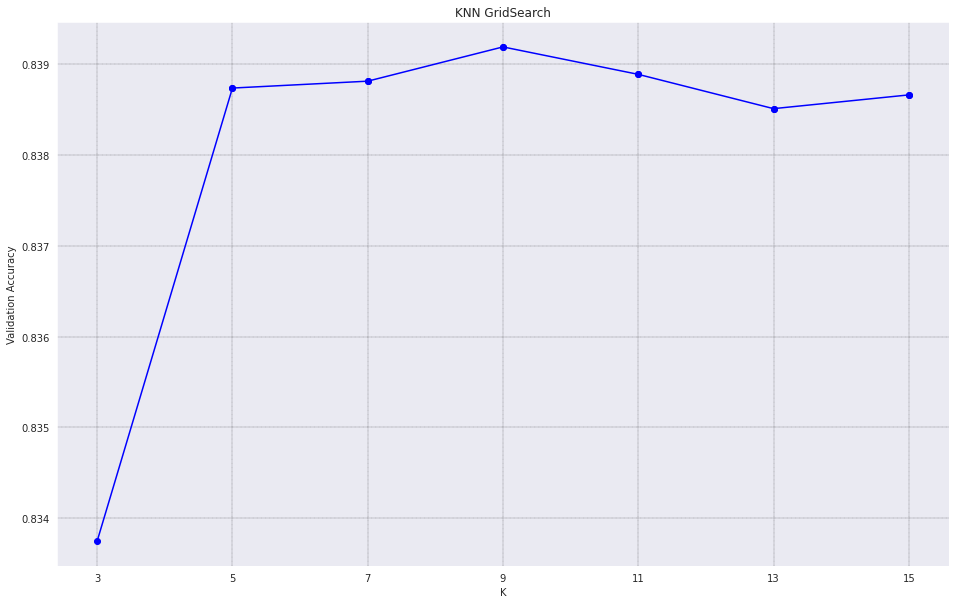

In [ ]:
best_config=KNN_CV(X_train, y_train)

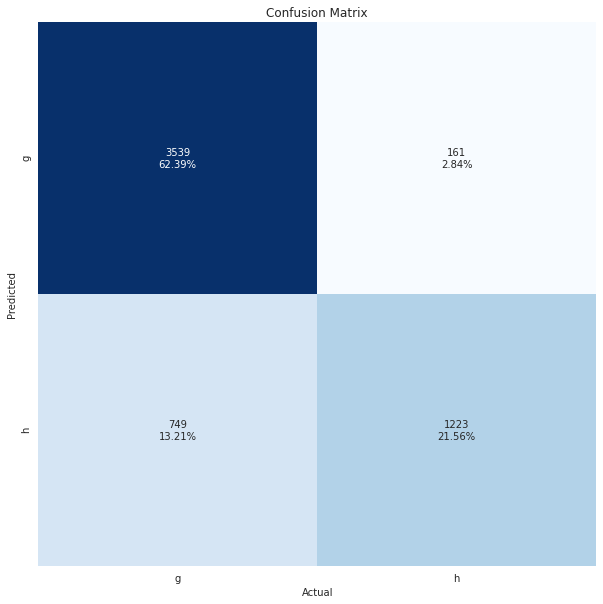

              precision    recall  f1-score   support

           g       0.83      0.96      0.89      3700
           h       0.88      0.62      0.73      1972

    accuracy                           0.84      5672
   macro avg       0.85      0.79      0.81      5672
weighted avg       0.85      0.84      0.83      5672

Accuracy on Test: 83.96%


In [ ]:
KNN_Test(best_config, X_train, y_train, X_test, y_test)

As it is shown on the two plots above, the best classifier is obtained with $K=9$, that produce an accuracy on the $Test$ $Set$ equalt to $84$% 

## *KNN - Standardized Dataset + SMOTE*

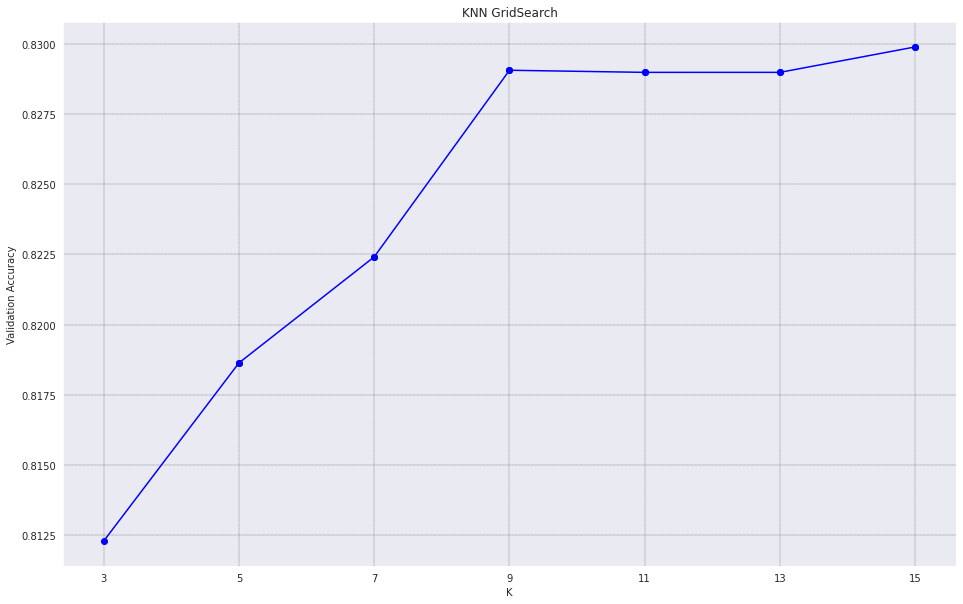

In [ ]:
best_config=KNN_CV(X_train, y_train, smote=True)

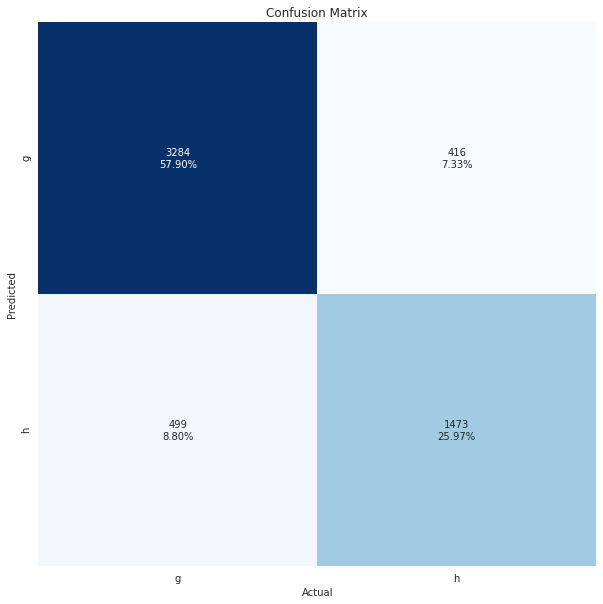

              precision    recall  f1-score   support

           g       0.87      0.89      0.88      3700
           h       0.78      0.75      0.76      1972

    accuracy                           0.84      5672
   macro avg       0.82      0.82      0.82      5672
weighted avg       0.84      0.84      0.84      5672

Accuracy on Test: 83.87%


In [ ]:
KNN_Test(best_config, X_train, y_train, X_test, y_test, smote=True)

If we compare this results with the model without $SMOTE$, we can see how on the $Test$ $Set$ it is able to predict better the label $h$, that is oversampled with abot $+4.5$%. However, at the same time is noticible that there is also a little drop on label $g$ with a $-4.5$%.<br>
So, the overall performaced are balanced with an analogue result of $84$% of accuracy for $K=15$.

## *KNN - Standardized Dataset + PCA*

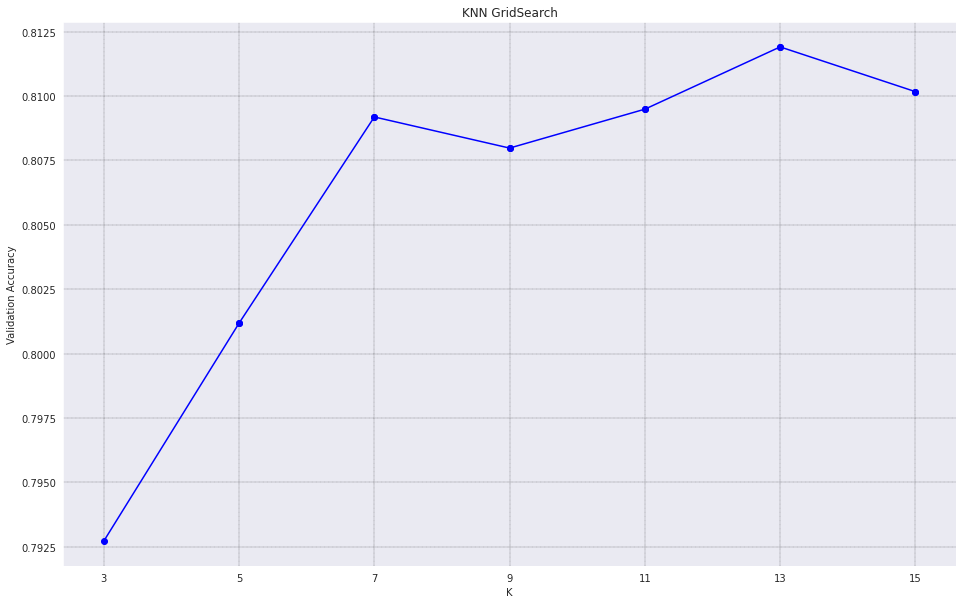

In [ ]:
best_config=KNN_CV(X_train_pca, y_train_pca)

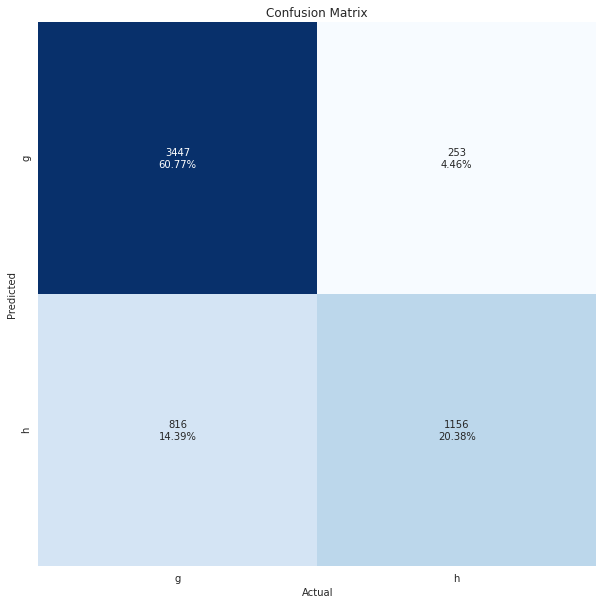

              precision    recall  f1-score   support

           g       0.81      0.93      0.87      3700
           h       0.82      0.59      0.68      1972

    accuracy                           0.81      5672
   macro avg       0.81      0.76      0.77      5672
weighted avg       0.81      0.81      0.80      5672

Accuracy on Test: 81.15%


In [ ]:
KNN_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Here instead the best classifier is obtained with  $K=13$ , that produce an accuracy on the  Test   Set  equalt to  $81$%.
The main cause of this drop can be ascribed to an higher level of both $FP$ (predicted $g$ but are $h$ - $+1.5$%) and $FN$ (predicted $h$ but are $g$ - $+1.5$%) compared with the $Standard$ model.


## *KNN - Standardized Dataset + PCA + SMOTE*

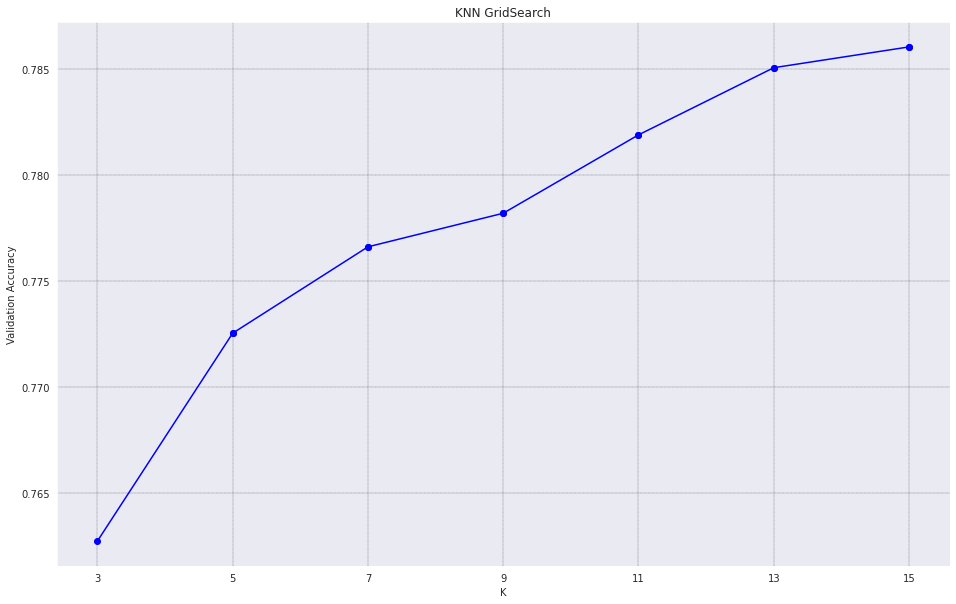

In [ ]:
best_config=KNN_CV(X_train_pca, y_train_pca, smote=True)

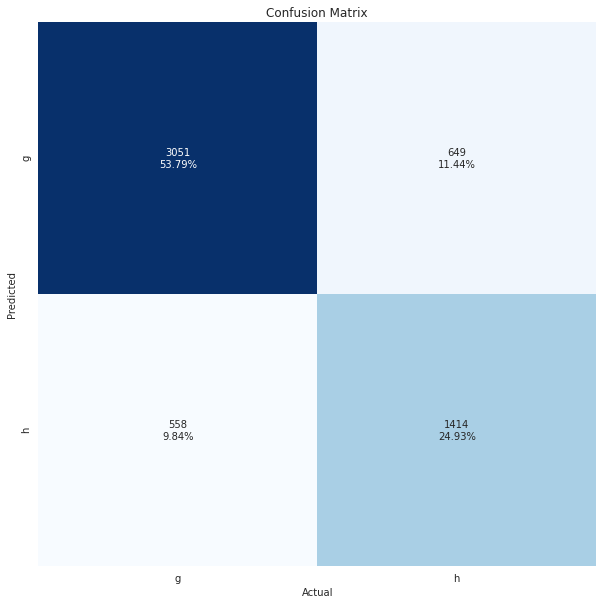

              precision    recall  f1-score   support

           g       0.85      0.82      0.83      3700
           h       0.69      0.72      0.70      1972

    accuracy                           0.79      5672
   macro avg       0.77      0.77      0.77      5672
weighted avg       0.79      0.79      0.79      5672

Accuracy on Test: 78.72%


In [ ]:
KNN_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca, smote=True)

Finally, here the last model for $KNN$, it dosen't provide good 
results, compared with the model with only $SMOTE$. The main issues can be found on an higher $FP$, due to the usage of $PCA$ features.

#**SUPPORTED VECTOR MACHINES**

In this section, it is explored one of the most important algorithm in ML: $Supported$ $Vector$ $Machine$. The $SVM$ algorithmic paradigm tackles the sample complexity challenge, by
searching for "large margin" separators. Roughly speaking, a halfspace separates a training set with a large margin if all the examples are not only on the correct side of the separating hyperplane, but also far away from it. Restricting the algorithm to output a large margin separator can yield a small sample complexity, even if the dimensionality of the feature space is high.

## *Linear SVM with Hard Margin*

Suppose to have a $n$ x $p$ data matrix $X$ and that these observations fall into two classees {$-1,1$}. Our goal is to develop a classifier that construct a hyperplane of dimensions $p$-$1$, that separates the observation according to their class labels. If a separating hyperplane exists, each future test observation is then assigned to a class, depending on which side of the hyperplane is located.<br>
In general, if our data can be perfectly separated using a hyperplane, then there will in fact exist an infinite number of such hyperplanes. This is because a given separating hyperplane can usually be shifted a tiny bit up or down, or rotated, without coming into contact with any of the observations.<br>
So the main concept of $SVM$ is to find the maximal margin hyperplane, which is the separating hyperplane that optimal
separating hyperplane is farthest from the training observations. It is obtained by computing the distance from each training observation to a given separating
hyperplane; the smallest such distance is the minimal distance from the observations to the hyperplane, and it is known as the margin. The maximal margin hyperplane is the separating hyperplane for which the margin is largest.<br>

<br>

<figure>
  <img src="https://miro.medium.com/max/921/1*06GSco3ItM3gwW2scY6Tmg.png" width="800" height="400" hspace="50">
  <figcaption></figcaption>
</figure>
<br>

These points that define the margins are called $support$ $vectors$, since they are vectors in p-dimensional space and they “support” the maximal margin hyperplane in the sense vector, that if these points were moved slightly then the maximal margin hyperplane would move as well. An important observation to be done is that the maximal margin hyperplane
depends directly on the support vectors, but not on the other observations: a movement to any of the other observations would not affect the separating hyperplane, provided that the observation’s movement does not cause it to cross the boundary set by the margin.

<h2><i>A bit of Algebra...</i></h2>

From an Algebra standpoint, a hyperplane is defined as a set of point $x$ such that $<w,x>+b=0$ where $w$ is a vetor perpendicular to the hyperplane and $x$ is a $p$ dimensional vector.<br> So, if there exist a halfspace $(w,b)$, the classification would be done as $y_i=sign(<w,x_i>+b)$ for all $i$ or just $y_i(<w,x_i>+b)>0$.<br>
To define the hard margin, we need to calculate the distance between each point: $\gamma=|<w,x>+b|$. <br>
The closest point in the training set to separate hyperplane is $min_{i\in[n]}|<w,x_i>+b|$, so the Hard-SVM rule can be written as: $argmax_{(w,b):||w||=1} min_{i\in[n]}|<w,x_i>+b|$ 
&nbsp; s.t. $y_i(<w,x_i>+b)>0$ <br>

or, equivalently,<br>

$argmax_{(w,b):||w||=1} min_{i\in[n]}y_i(<w,x_i>+b)$ &nbsp; such that for any point $(x_i,y_i)$ belonging to the training set ($y_i\in{-1,1}$) it is verified that $y_i(<w,x_i>+b)\geq\gamma$ which means that the point $x_i$ is correcty classified.<br>

The margin itself can be written as the distance from the decision bundary to the nearest training points, for example $x_-$ and $x_+$, i.e. $\gamma=\frac{<x_+-x_-,w>}{2||w||}=\frac{1}{||w||}$.<br>

More in general, by combining all of these equations, at the end we look for minimizing $||w||$ such that $\gamma$ increase, i.e. $(w_0,b_0)=argmin_{(w,b)}\frac{1}{2}||w||^2$ &nbsp; s.t. $y_i(<w,x_i>+b)\geq1$ with final output $\hat{w}=\frac{w_0}{|w_0||}$ and $\hat{b}=\frac{b_0}{|b_0||}$.<br>
(The constraint above is multiplied by $\frac{1}{2}$ and squared since we want to minimize something derivable, which derivate is continue and derivable up to the second order).

<br>

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/800px-SVM_margin.png" width="500" height="500" hspace="150">
  <figcaption></figcaption>
</figure>
<br>

This optimization problem can be rewritten in its $Dual$ $Form$ as a $Lagrange$ function:<br>
$L(w,b,\alpha)= \frac{1}{2}||w||^2+\sum_{i}\alpha_i[y_i[<w,x_i>+b]-1]$,<br>
where $\alpha_i$ is the constant that indicates the points that are on the gutter (for them $\alpha>0$, the rest are going to be $0$).<br>

By taking the derivative of $L(w,b,\alpha)$ with respect to $b$ and $w$, making them vanishing and plugging them back inside $L(w,b,\alpha)$ yields to: <br>
$max_{\alpha} \sum_i\alpha_i - \frac{1}{2}\sum_{i,j}\alpha_i \alpha_j y_i y_j <x_i, x_j> \quad$ s.t. $\sum_i \alpha_iy_i = 0$, $\alpha_i \geq 0$$\quad$for each $i=1,..,p$.<br>

Finally, this allows to write as solution $w=\sum_{i}\alpha_iy_ix_i$, &nbsp;i.e a weigthed linear combination of the points of the 2 classes that lie on the margins. Those vectors are the ones that support my decision function.



## *Linear SVM with Soft Margin*

Until now, we have supposed to have linearly separable data, but this often is not the case in real datasets. So, here it comes Soft-SVM, that can be viewed as a relaxation of the Hard-SVM rule that can be applied, even if the training set is not linearly separable. <br>
A natural relaxation is to allow the constraint to be
violated for some of the examples in the training set. This can be modeled by introducing nonnegative slack variables, $\xi_i$, and replacing each constraint $y_i(<w,x_i>+b)\geq1$ by the constraint  $y_i(<w,x_i>+b)\geq1-\xi_i$.<br>
That is, $\xi_i$ measures by how much the constraint $y_i(<w,x_i>+b)\geq1$ is being violated.<br>
By plugging this new formulation back into the general solution, we obtain:<br>
$min_{w} \frac{||w||^2}{2}+C\sum_i \xi_i \quad$ s.t. $y_i(⟨w,x_i⟩+b)\geq 1-\xi_i$ $\quad\xi_i \geq 0 \quad$ for each $i=1,..,p$.<br>

From this, we can put it again under the $Dual$ $Problem$ formulation: <br>
$max_{\alpha} \sum_i\alpha_i - \frac{1}{2}\sum_{i,j}\alpha_i \alpha_j y_i y_j <x_i, x_j> \quad$ s.t. $\sum_i \alpha_iy_i = 0$, $\alpha_i \geq 0$ and $\alpha_i\in[0,C]$$\quad$for each $i=1,..,p$.<br>

Here, the parameter $C$ is the regularization factor and together with $\xi$, which expresses the distance between the misclassified sample and the margin, it's able to allow misclassification by making the margin soft.

In particular, $C$ is the inverse of regularization strength:
* if $C$ is **big**, the model chooses a smaller-margin hyperplane;
* if $C$ is **small**, the model chooses a larger-margin hyperplane $\rightarrow$ it allows more points to be misclassified.

<br>

<figure>
  <img src="https://drive.google.com/uc?export=view&id=1Q8-OyR233jFvE1EdZXUm_0PXS_RXOhDy" width="600" height="400" hspace="120">
  <figcaption></figcaption>
</figure>
<br>

In [ ]:
#@title #####SHOW CODE - SVM CV
def SVM_CV(X_inn, y_inn,smote=False,kernel="linear"):
  kf = StratifiedKFold(5)
  final_accuracies = []
  sm = SMOTE(random_state=42)
  if kernel=="rbf":
    params = {
      "gamma":[0.01,0.1, 1, 10,100],
      "C":[0.01,0.1, 1, 10,100],
    }
  else:
    params = {
      "C":[0.01,0.1, 1, 10,100]
    }

  for config in ParameterGrid(params):
    clf_accuracies=[]
    #print(config)
    for train_indices, valid_indices in kf.split(X_inn, y_inn):
      X_train=X_inn[train_indices]
      y_train=y_inn[train_indices]
      X_val=X_inn[valid_indices]
      y_val=y_inn[valid_indices]

      if smote:
        X_train, y_train=sm.fit_resample(X_train, y_train)

      clf=SVC(kernel=kernel,**config)
      clf.fit(X_train, y_train)
      y_pred=clf.predict(X_val)

      acc=accuracy_score(y_val, y_pred)
      clf_accuracies.append(acc)
    final_accuracies.append(np.average(clf_accuracies))
    #print(np.average(clf_accuracies))

  best_config=list(ParameterGrid(params))[np.argmax(final_accuracies)]

  if kernel=="linear":
    with sns.axes_style("darkgrid"):
      f=[0.01, 0.1, 1, 10,100]
      x=[0,1,2,3,4]
      plt.figure(figsize=(16,10))
      #for i in range(0, len(f)):
      plt.plot(x, final_accuracies, 'bo-')
      plt.title(f"SVM {kernel} GridSearch")
      plt.xlabel('C')
      plt.ylabel('Validation Accuracy')
      plt.xticks(np.arange(5),f)
      plt.grid(color='k', ls = '--', lw = 0.25)
      plt.show()
  else:
    with sns.axes_style("darkgrid"):
      tmp=np.array(final_accuracies)*100
      tmp=np.round(tmp,2)
      tmp=np.expand_dims(tmp,axis=1)
      tmp=np.reshape(tmp,(5,5))
      dm=np.rot90(tmp)
      plt.figure(figsize=(10,10))
      lblx=["0.01","0.1","1","10","100"]
      lbly=["100","10","1","0.1","0.01"]
      cmap=sns.diverging_palette(240, 10, as_cmap=True)
      sns.heatmap(dm, annot=True ,fmt="", cmap=cmap, cbar=False,xticklabels=lblx,yticklabels=lbly,vmin=65,vmax=90,center=78)
      plt.title("Confusion Matrix")
      plt.xlabel("C")
      plt.ylabel("Gamma")
      plt.show()

  return best_config

In [ ]:
#@title #####SHOW CODE - SVM TEST EVALUTION
def SVM_Test(best_config, X_train, y_train, X_test, y_test, smote=False, kernel="linear"):
  sm = SMOTE(random_state=42)
  if smote:
    X_train, y_train=sm.fit_resample(X_train, y_train)
  bestClassifier=SVC(kernel=kernel,**best_config)
  bestClassifier.fit(X_train, y_train)
  y_pred=bestClassifier.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  report=classification_report(y_test, y_pred)
  cm=confusion_matrix(y_test, y_pred)
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=labels,fmt="",cmap="Blues",cbar=False,xticklabels=["g","h"],yticklabels=["g","h"])
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
  print(report)
  print(f"Accuracy on Test: {np.array(acc*100).round(2)}%")

## *Linear SVM - Standardized Dataset*

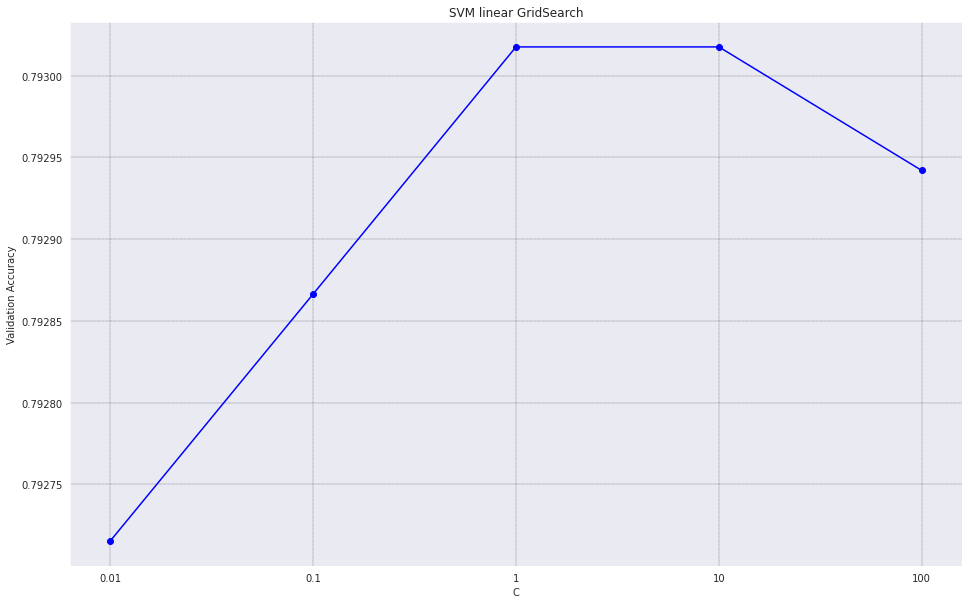

In [ ]:
best_config=SVM_CV(X_train, y_train)

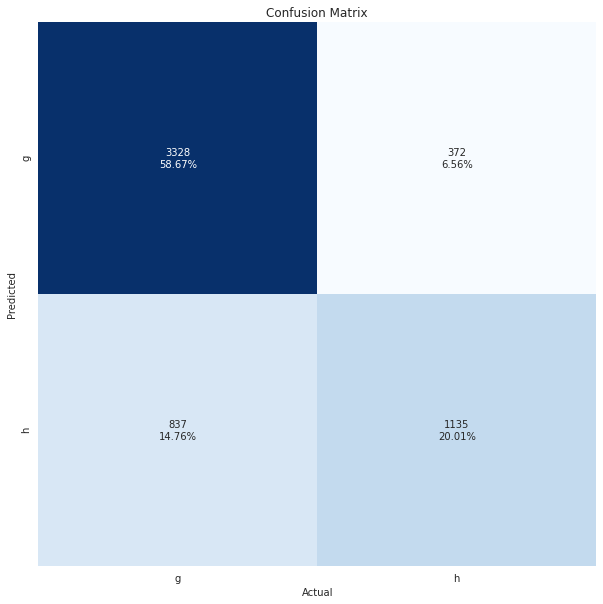

              precision    recall  f1-score   support

           g       0.80      0.90      0.85      3700
           h       0.75      0.58      0.65      1972

    accuracy                           0.79      5672
   macro avg       0.78      0.74      0.75      5672
weighted avg       0.78      0.79      0.78      5672

Accuracy on Test: 78.68%


In [ ]:
SVM_Test(best_config, X_train, y_train, X_test, y_test)

Here as for the other trials on $SVM$, I have tested different values of C: $[0.01, 0.1, 1, 10, 100]$. The best result is obtained with $C=1$ and produce a result on the $Test$ $Set$ = $79$%.

## *Linear SVM - Standardized Dataset + SMOTE*

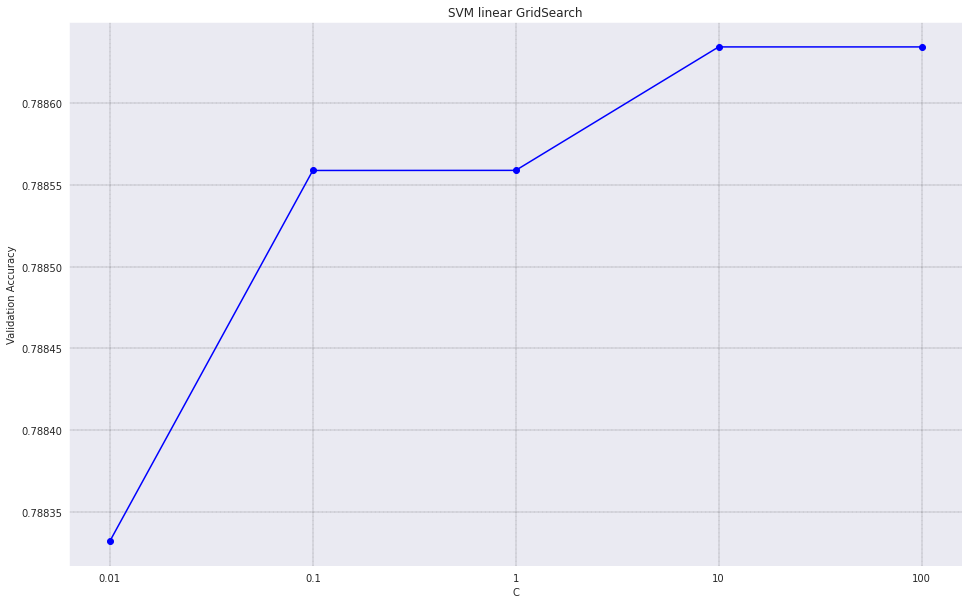

In [ ]:
best_config=SVM_CV(X_train, y_train, smote=True)

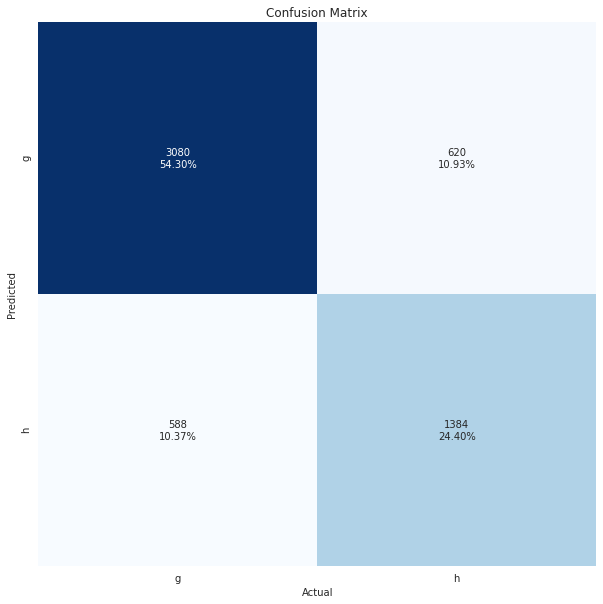

              precision    recall  f1-score   support

           g       0.84      0.83      0.84      3700
           h       0.69      0.70      0.70      1972

    accuracy                           0.79      5672
   macro avg       0.77      0.77      0.77      5672
weighted avg       0.79      0.79      0.79      5672

Accuracy on Test: 78.7%


In [ ]:
SVM_Test(best_config, X_train, y_train, X_test, y_test, smote=True)

As stated in the analogous section of $KNN$, the application of the oversempling causes a better prediction on the minority class, however there is also a similar drop in percentage on the majority class, causing a very similar result as in the model without $SMOTE$.
The best result is obtained with $C=10$ with a final result of $79$%.

## *Linear SVM - Standardized Dataset + PCA*

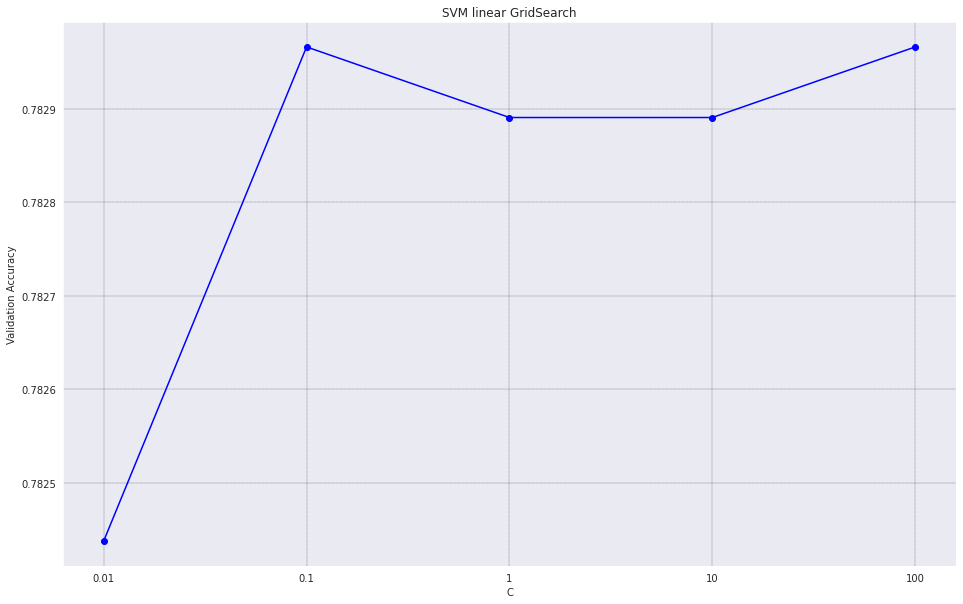

In [ ]:
best_config=SVM_CV(X_train_pca, y_train_pca)

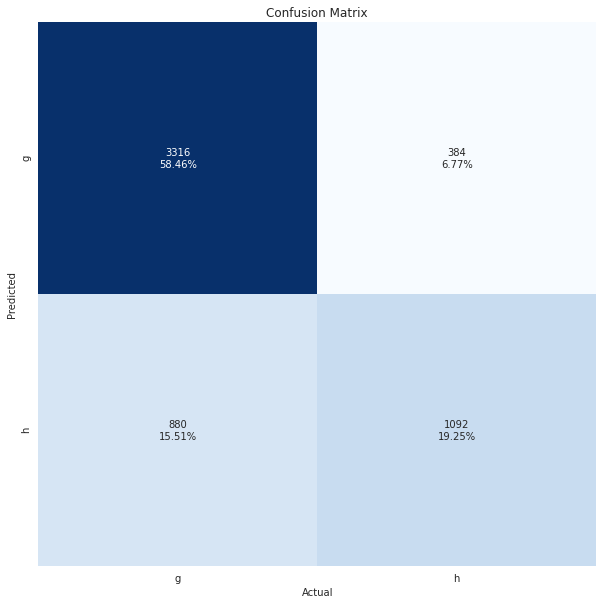

              precision    recall  f1-score   support

           g       0.79      0.90      0.84      3700
           h       0.74      0.55      0.63      1972

    accuracy                           0.78      5672
   macro avg       0.77      0.72      0.74      5672
weighted avg       0.77      0.78      0.77      5672

Accuracy on Test: 77.72%


In [ ]:
SVM_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Here instead, the best classifier is obtained with  $C=1$ , that produce an accuracy on the  Test   Set  equalt to  $78$%.
The main cause of this drop can be ascribed to an higher level of  $FN$ (predicted $h$ but are $g$ - $+1.5$%), compared with the $Standard$ model.

## *Linear SVM - Standardized Dataset + PCA + SMOTE*

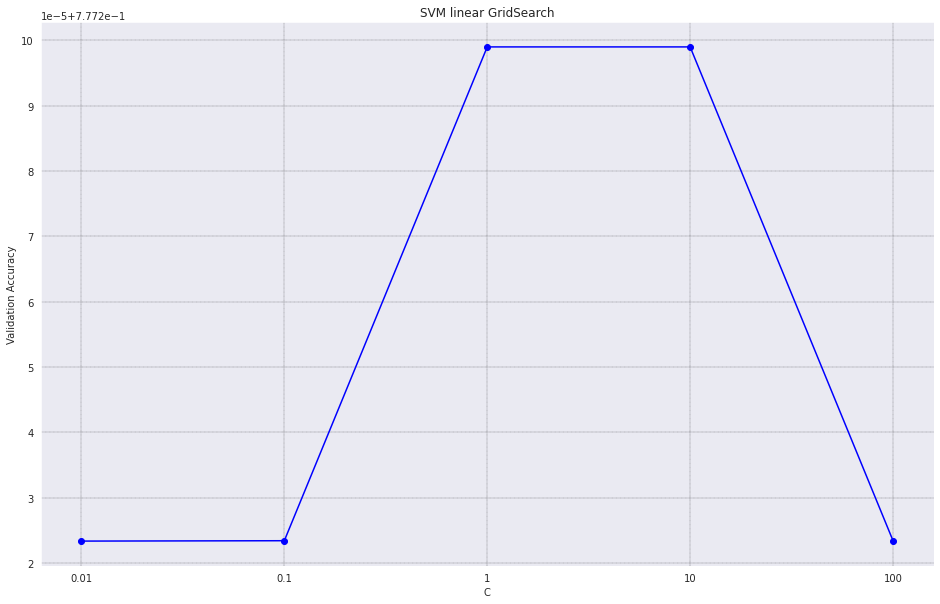

In [ ]:
best_config=SVM_CV(X_train_pca, y_train_pca, smote=True)

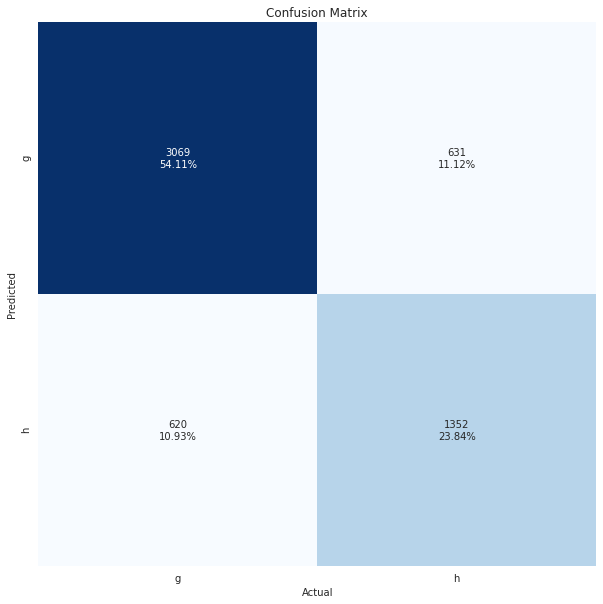

              precision    recall  f1-score   support

           g       0.83      0.83      0.83      3700
           h       0.68      0.69      0.68      1972

    accuracy                           0.78      5672
   macro avg       0.76      0.76      0.76      5672
weighted avg       0.78      0.78      0.78      5672

Accuracy on Test: 77.94%


In [ ]:
SVM_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca, smote=True)

Finally, here the last model for $Linear$ $SVM$: it provides very comparable results compared with the model with only $PCA$. The best result is obtained with $C=1$ and with a final result of $78$%.

# **SVM with RBF Kernel**

As we have seen so far, $SVM$ works well when the data are linearly separable or overall when their distribution is quite linear. However, this is not always the case, since the data can be mixed in the space.<br>
A really powerful solution is to map my data $X$ into a new features spece $F$, that makes those data linearly separable, in order to then apply the standard $SVM$ algorithm. This can be easily done since both the $Decision$ $Rule$ $\sum_i\alpha_iy_i<x_i,x_j> $ and $Optimization$ $Problem$ $max_{\alpha} \sum_i\alpha_i - \frac{1}{2}\sum_{i,j}\alpha_i \alpha_jy_iy_j<x_i,x_j>$ depend only on the dot product of the sample.<br>
So, by applying a $Kernel$, we implement a mapping function $\phi$ that move the inner product in the space $F$. The kernel can be then defined as $K(x,x')=<\phi(x),\phi(x')>$.<br>

<br>
<figure>
  <img src="https://miro.medium.com/max/872/1*zWzeMGyCc7KvGD9X8lwlnQ.png" width="800" height="400" hspace="50">
  <figcaption></figcaption>
</figure>
<br>

More in detail, we can define a Gram matrix $G$, where $G_{i,j}=<\xi(x_i),\xi(x_j)>$, and here comes useful the Mercer's theorem.
In particular, it states that a symmetric function $K:X$x$X \mapsto {\rm I\!R}$ implements an inner product in some Hilbert space ($F$ in our case), if and only if it is positive semidefinite or, equivalently, if for all our $x_1,...,x_m$ the Gram matrix defined above is a positive semidefinite matrix.

<h2><i>RBF</i></h2>

For the implementation inside this work, I decide to opt for $SVM$ with $Radial$ $Basis$ $Function$ kernel</i>. It is defined as $K(x,y)=e^{-\gamma\|x-y\|^2}$, where the hyperparameters $C$ is the one mantioned in the $Soft$-$SVM$ sectionand, instead $\gamma$ is defined as inversely proportional to the variance of the Gaussian, and it can be seen as the inverse of the radius of influence of samples select by the SVM model.
<br>
In terms of similarity measure, a smaller value of $\gamma$ means that two points can be considered similar, even if they are far form each other in terms of Euclidean distance.
Consequently, the effect on the decision boundaries is the following: an high value of $\gamma$ will cause the boundaries to be affected only by points which are very close to them.

## *RBF SVM - Standardized Dataset*

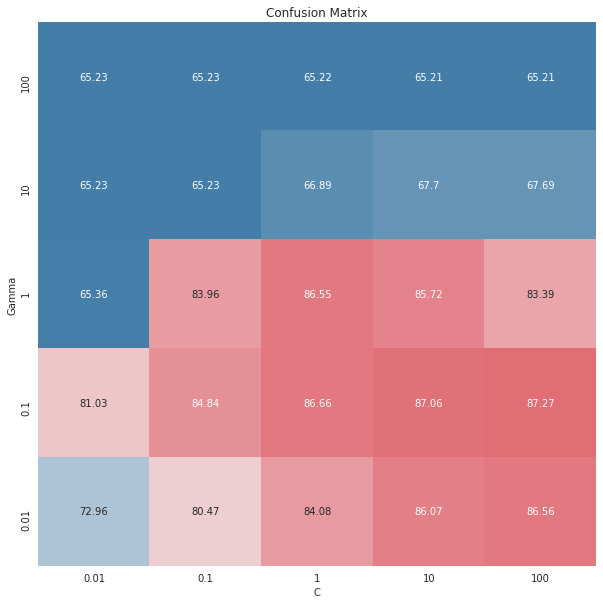

In [ ]:
best_config = SVM_CV(X_train, y_train, kernel="rbf")

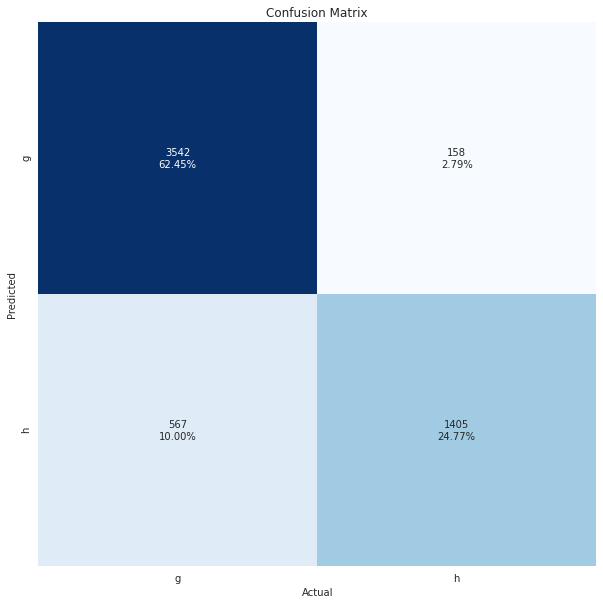

              precision    recall  f1-score   support

           g       0.86      0.96      0.91      3700
           h       0.90      0.71      0.79      1972

    accuracy                           0.87      5672
   macro avg       0.88      0.83      0.85      5672
weighted avg       0.87      0.87      0.87      5672

Accuracy on Test: 87.22%


In [ ]:
SVM_Test(best_config, X_train, y_train, X_test, y_test, kernel="rbf")

For all the models done with the $RBF$ kernel, I have tested different values for both $C$ and $gamma$: $[0.01, 0.1, 1, 10, 100]$.<br>
The best result is obtained with $C=100$, $gamma=0.1$ and produce a result on the $Test$ $Set$ = $87$%.<br>
This result is way better than the one with the $Linear$ kernel, this can be easily explained by remembering the plot of the $PCA$ that have showed how the data points are really fuzzy in the space.

## *RBF SVM - Standardized Dataset + SMOTE*

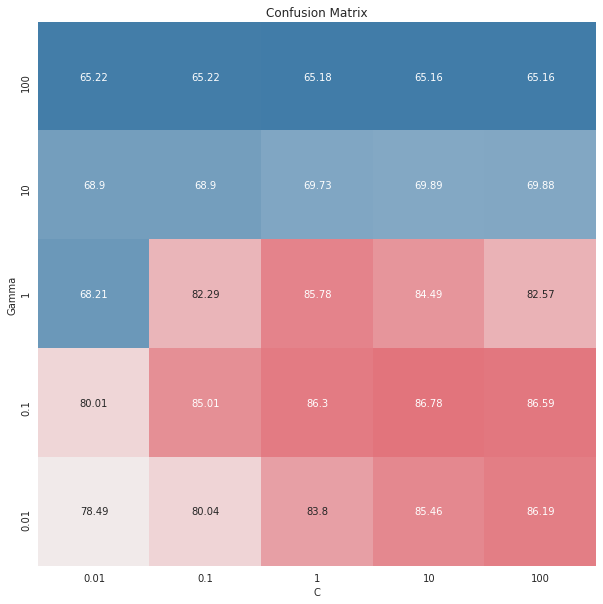

In [ ]:
best_config=SVM_CV(X_train, y_train, smote=True, kernel="rbf")

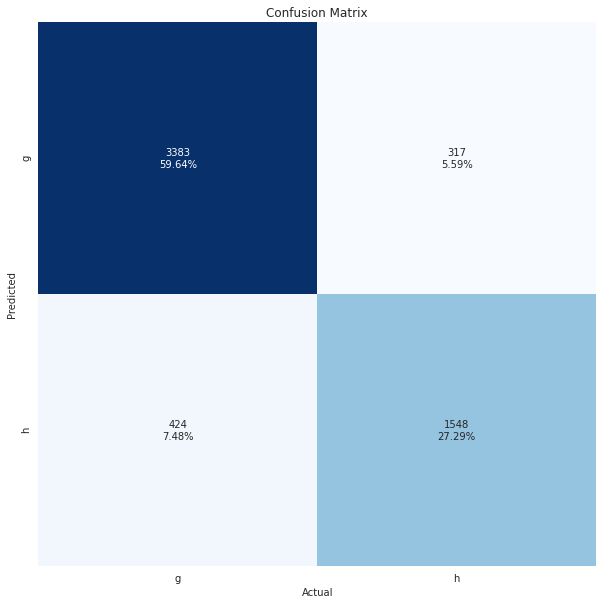

              precision    recall  f1-score   support

           g       0.89      0.91      0.90      3700
           h       0.83      0.78      0.81      1972

    accuracy                           0.87      5672
   macro avg       0.86      0.85      0.85      5672
weighted avg       0.87      0.87      0.87      5672

Accuracy on Test: 86.94%


In [ ]:
SVM_Test(best_config, X_train, y_train, X_test, y_test, smote=True, kernel="rbf")

Like in all the others algorithm with $SMOTE$, also here there are better performances on the $background$ class at the expense of the $gamma$ labels. The best result is with $C=10$, $gamma=0.1$ for a result on the $Test$ of $87$%.

## *RBF SVM - Standardized Dataset + PCA*

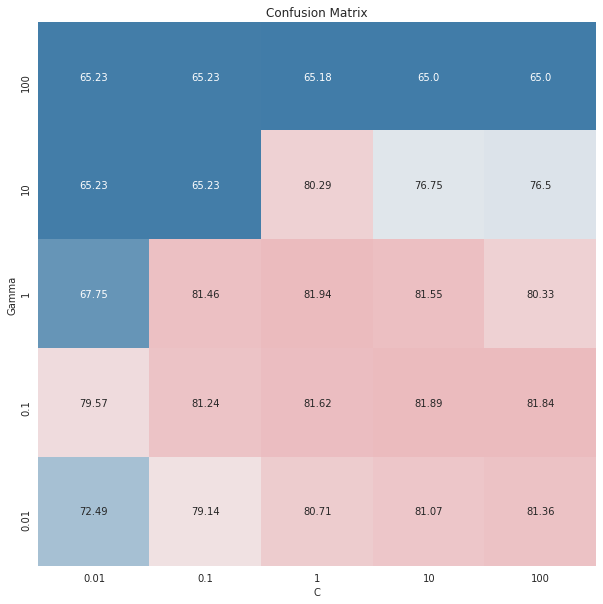

In [ ]:
best_config=SVM_CV(X_train_pca, y_train_pca, kernel="rbf")

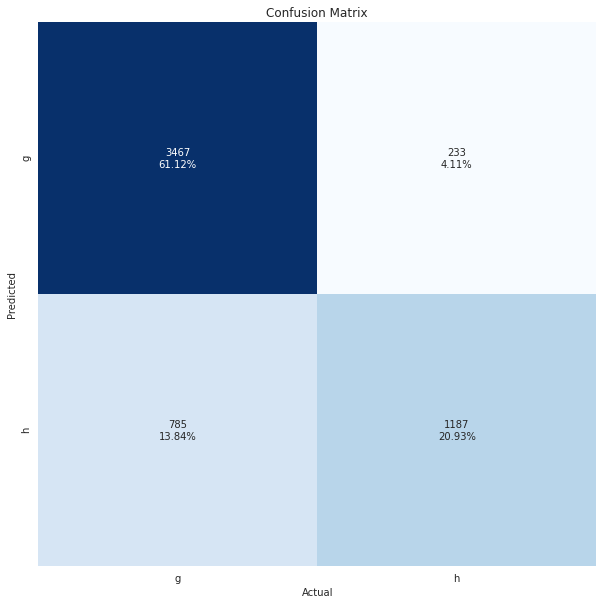

              precision    recall  f1-score   support

           g       0.82      0.94      0.87      3700
           h       0.84      0.60      0.70      1972

    accuracy                           0.82      5672
   macro avg       0.83      0.77      0.79      5672
weighted avg       0.82      0.82      0.81      5672

Accuracy on Test: 82.05%


In [ ]:
SVM_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca, kernel="rbf")

On the application with $PCA$, we can state how the reduction of dimensionality have a huge drop of performance, in particular on $h$.
The best result is of $82$% with $C$ and $gamma$ equal to $1$.

## *RBF SVM - Standardized Dataset + PCA + SMOTE*

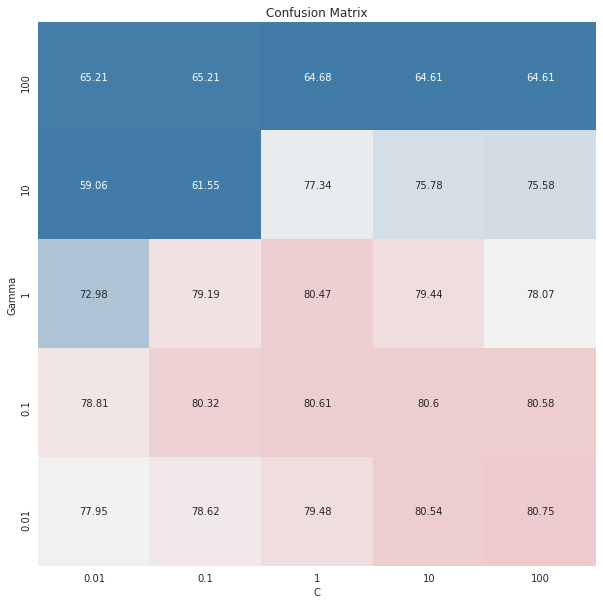

In [ ]:
best_config=SVM_CV(X_train_pca, y_train_pca, smote=True, kernel="rbf")

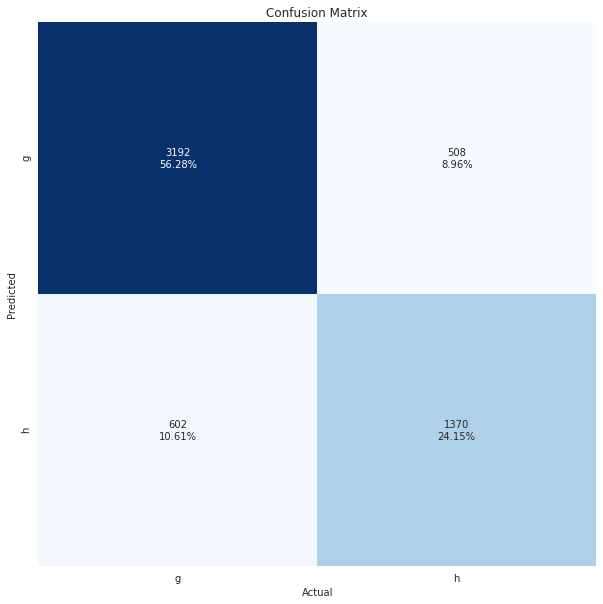

              precision    recall  f1-score   support

           g       0.84      0.86      0.85      3700
           h       0.73      0.69      0.71      1972

    accuracy                           0.80      5672
   macro avg       0.79      0.78      0.78      5672
weighted avg       0.80      0.80      0.80      5672

Accuracy on Test: 80.43%


In [ ]:
SVM_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca, smote=True, kernel="rbf")

By adding the oversampling to the previous model, the algorithm tries to mitigate the lower performances on the $background$. However, by achieving this result, as consequence the $SMOTE$ cause a drop on $gamma$. So, the final result is $80$% with $C=100$ and $gamma=0.01$.

# **Still enough time?**







<br>

<figure>
  <img src="https://drive.google.com/uc?export=view&id=1rc_ucnh2qY2vVGAy28RMFZVpDDRt0jje" width="1000" height="550" hspace="0">
  <figcaption></figcaption>
</figure>
<br>


#**DECISION TREE**

$Decision$ $Trees$ are a non-parametric supervised learning method, used for classification and regression. The goal is to create a model that predicts the value of a target variable, by learning simple decision rules inferred from the data features.
These involve *segmenting* the predictor space into a number of simple regions and since the set of splitting rules used to segment the predictor space can be summarized in a tree, these types of approaches are known as *decision-tree* methods.
<br>
To the basics $Decision$ $trees$ learn from data to approximate a set of if-then-else decision rules. In this case, it is a tree-structured classifier and the final result is a tree with **decision nodes** and **leaf nodes**, where the first are the internal nodes based on the features of the dataset, are used to make any decision and have multiple branches (2 or more), whereas leaf nodes are the output of those decisions and do not contain any further branches. In general, the deeper the tree, the more complex the decision rules and the fitter the model.

<br>

<img src="https://addepto.com/wp-content/uploads/2020/04/Zrzut-ekranu-2020-04-28-o-14.18.08.png" width="600" height="420" hspace="180">

## *How does the algorithm work?*

In a $Decision$ $Tree$, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process, until it reaches the leaf node of the tree. The complete process can be better understood using the below algorithm:

1.   Begin the tree with the root node, say $R$, and with a set of records $D$.

2.   Select the best attribute $A$ on which to split $D$ by using a particular **Attribute Selection Measure** and label that node as $A$.

3.   Split $D$ into smaller subsets and recursively apply the procedure to each subset.

4.   If $D$ contains records that belong to the same class $y$ then that node is a leaf node labeld as $y$.

About the **Attribute Selection Measure** mentioned before, there exist different type of measure on which decide the splits:

* **Misclassification Error** : it is the fraction of the training observations in that region node, that do not belong to the most common class. In general, it is not used for splits since it is not sufficiently sensitive for tree-growing, however it is useful in case of pruning.<br> It is calculated as: $E = 1-max_k \hat{p}_{mk}$ &nbsp;, where $\hat{p}_{mk}$ is the relative frequency of class $k$ at node $m$.

* **GINI Index**: it is a measure of impurity or purity, used while creating a decision tree in the algorithm. An attribute with the **low Gini index** should be preferred as compared to the high Gini index. In general, small values indicates that a node containd predominantly observations from a single class.<br> It is calculated as: $G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$ &nbsp; where $k$ is the number of unique labels in that particular split and $\hat{p}_{mk}$ is the same as before.

* **Cross-Entropy** : this measures has based comptations that are similar to GINI index computations. As in the previous case, the best split is choosen according to the smallest entropy.<br>
It is calculated as: $D = -\sum_{k=1}^K \hat{p}_{mk}log(\hat{p}_{mk})$ with $\hat{p}_{mk}$ as in the two measures before.

Overall, $Decision$ $Trees$ are built with a **top-down** algorithm because it begins at the root node and then successively splits the predictor space. They are also **greedy**, because at each step of the building process, the best attribute for the split is selected locally. 

One of the main issues of $Decision$ $Trees$ is that they commonly overfit the traing set. In order to mitigate the poor performances on the test data, $Pruning$ the tree is essential.
Two possible solution can be applied:

*   $Pre$-$Pruning$: the algorithm is stopped before it becomes a fully-grown tree. Typical the stopping conditions for a node are if all instances belong to the same class or if all the attribute values are the same. More restrictive conditios can be applied as stopping if the number of instances is less that some specified threshold, or if expanding the current node does not improve impurity measures

*   $Post$-$Pruning$: it is applied on a built tree and it consists in trimming the nodes of the decision tree in a bottom-up way. After the trim, if the error improves, the sub-tree is replaced with a leaf-node that has as label the most frequent one of the cutted sub-tree.



In [ ]:
#@title #####SHOW CODE - DT CV
def DT_CV(X_inn, y_inn,smote=False,pca=False):
  kf = StratifiedKFold(5)
  final_accuracies = []
  sm = SMOTE(random_state=42)
  
  params = {
      "criterion":["gini","entropy"]
  }

  for config in ParameterGrid(params):
    clf_accuracies=[]
    for train_indices, valid_indices in kf.split(X_inn, y_inn):
      X_train=X_inn[train_indices]
      y_train=y_inn[train_indices]
      X_val=X_inn[valid_indices]
      y_val=y_inn[valid_indices]

      if smote:
        X_train, y_train=sm.fit_resample(X_train, y_train)

      clf=DecisionTreeClassifier(**config)
      clf.fit(X_train, y_train)
      y_pred=clf.predict(X_val)

      acc=accuracy_score(y_val, y_pred)
      clf_accuracies.append(acc)
    final_accuracies.append(np.average(clf_accuracies))

  best_config=list(ParameterGrid(params))[np.argmax(final_accuracies)]
  print(f"Validation Accuracy with GINI: {final_accuracies[0]}")
  print(f"Validation Accuracy with ENTROPY: {final_accuracies[1]}")
  '''
  bestclf=DecisionTreeClassifier(**best_config)
  bestclf.fit(X_inn,y_inn)
  if pca:
    feat_name=["PC1", "PC2","PC3","PC4","PC5"]
  else:
    feat_name=['fLength', 'fWidth', 'fSize', 'fConc',
               'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha','fDist']
  plt.figure(figsize=(20,20))
  dot_data = tree.plot_tree(bestclf, 
                                feature_names=feat_name,  
                                class_names=["g","h"],
                                filled=True)
  plt.show()
  '''
  return best_config

In [ ]:
#@title #####SHOW CODE - DT TEST EVALUTION
def DT_Test(best_config, X_train, y_train, X_test, y_test, smote=False):
  sm = SMOTE(random_state=42)
  if smote:
    X_train, y_train=sm.fit_resample(X_train, y_train)
  bestClassifier=DecisionTreeClassifier(**best_config)
  bestClassifier.fit(X_train, y_train)
  y_pred=bestClassifier.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  report=classification_report(y_test, y_pred)
  cm=confusion_matrix(y_test, y_pred)
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=labels,fmt="",cmap="Blues",cbar=False,xticklabels=["g","h"],yticklabels=["g","h"])
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
  print(report)
  print(f"Accuracy on Test: {np.array(acc*100).round(2)}%")

## *DT - Standardized Dataset*

In [ ]:
best_config= DT_CV(X_train, y_train)

Validation Accuracy with GINI: 0.8100204141598712
Validation Accuracy with ENTROPY: 0.8117586874400518


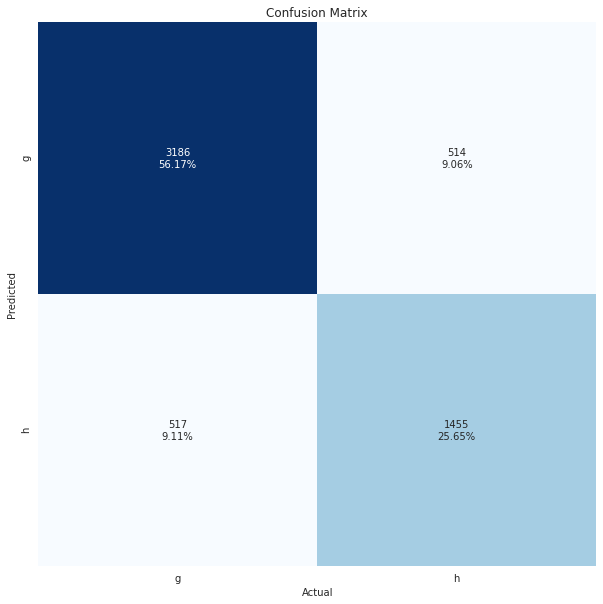

              precision    recall  f1-score   support

           g       0.86      0.86      0.86      3700
           h       0.74      0.74      0.74      1972

    accuracy                           0.82      5672
   macro avg       0.80      0.80      0.80      5672
weighted avg       0.82      0.82      0.82      5672

Accuracy on Test: 81.82%


In [ ]:
DT_Test(best_config, X_train, y_train, X_test, y_test)

The best tree is obtained with $Entropy$ as criterion.The final accuracy on the test is of $82$%.

## *DT - Standardized Dataset + SMOTE*

In [ ]:
best_config= DT_CV(X_train, y_train, smote=True)

Validation Accuracy with GINI: 0.801
Validation Accuracy with ENTROPY: 0.8018


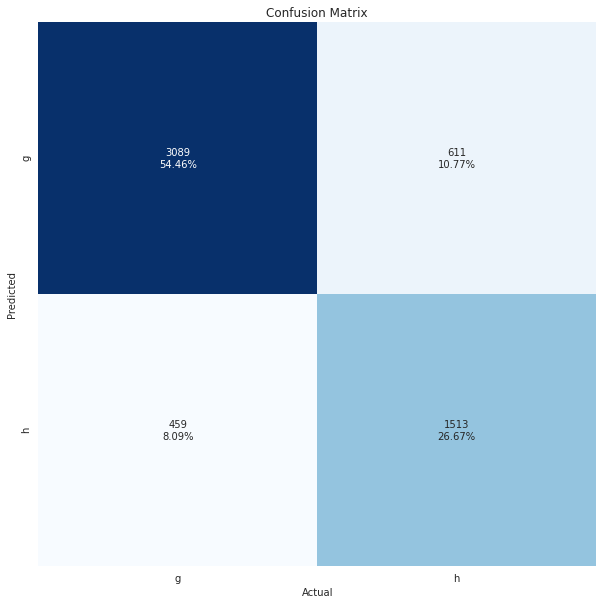

              precision    recall  f1-score   support

           g       0.87      0.83      0.85      3700
           h       0.71      0.77      0.74      1972

    accuracy                           0.81      5672
   macro avg       0.79      0.80      0.80      5672
weighted avg       0.82      0.81      0.81      5672

Accuracy on Test: 81.14%


In [ ]:
DT_Test(best_config, X_train, y_train, X_test, y_test, smote=True)

Here instead the best $Tree$ is made with the $Entropy$ split. The score on the test is $81$%, a bit lower that with the the standardize dataset. Like with the others algorithm, $SMOTE$, by trying to give equal weight to the two classes, causes a drop on accuracy of $g$ in favor of $h$, but since there are more $g$ sample, at the end the global accuracy is lower.

## *DT - Standardized Dataset + PCA*

In [ ]:
best_config= DT_CV(X_train_pca, y_train_pca)

Validation Accuracy with GINI: 0.7515
Validation Accuracy with ENTROPY: 0.7592


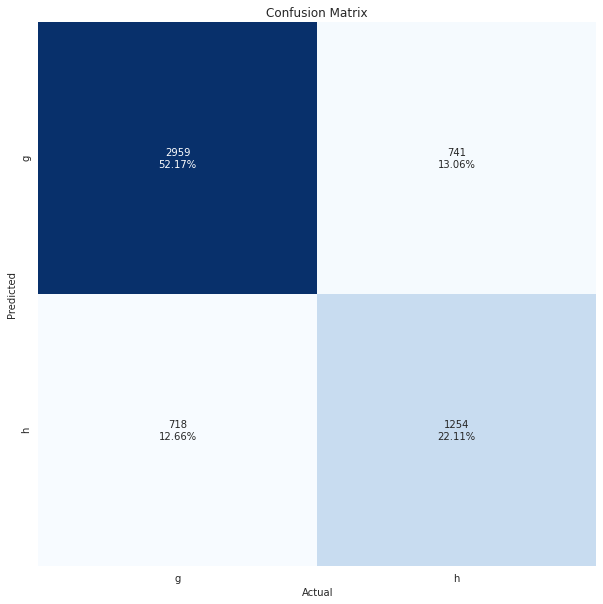

              precision    recall  f1-score   support

           g       0.80      0.80      0.80      3700
           h       0.63      0.64      0.63      1972

    accuracy                           0.74      5672
   macro avg       0.72      0.72      0.72      5672
weighted avg       0.74      0.74      0.74      5672

Accuracy on Test: 74.28%


In [ ]:
DT_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

In this case, with $PCA$ there is a huge drop on accuracy of both classes. The final score is of $74$% with an $Entropy$ split.

## *DT - Standardized Dataset + PCA + SMOTE*



In [ ]:
best_config= DT_CV(X_train_pca, y_train_pca, smote=True)

Validation Accuracy with GINI: 0.7365
Validation Accuracy with ENTROPY: 0.7456


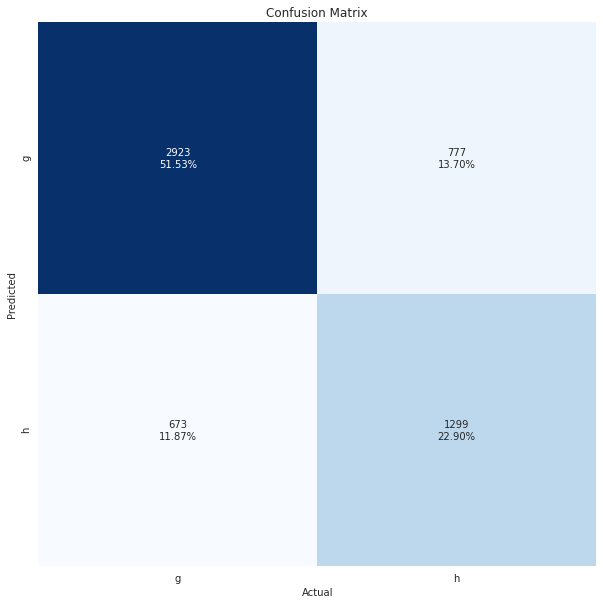

              precision    recall  f1-score   support

           g       0.81      0.79      0.80      3700
           h       0.63      0.66      0.64      1972

    accuracy                           0.74      5672
   macro avg       0.72      0.72      0.72      5672
weighted avg       0.75      0.74      0.75      5672

Accuracy on Test: 74.44%


In [ ]:
DT_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca, smote=True)

In this final combination, the result is a bit better than the previous one. So, in this situation, the addition of $SMOTE$ helps to increase the precision of $g$ and the recall of $h$.
However, the result of 74% is still very poor compared with the first ones.

#**RANDOM FOREST**

As anticipated in the section before, $Decision$ $Trees$ have an high trend of overfitting their training sets, i.e. they have a low bias and an high variace. A way to mitigate it is the $Random$ $Forest$, that like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

<br>

<figure>
  <img src="https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg" width="1000" height="580" hspace="0">
  <figcaption></figcaption>
</figure>
<br>

The fundamental concept behind $Random$ $Forest$ is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is that a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models, i.e. in simpler words each trees. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.<br>
To ensure that each individual tree is not too correlated, these two methods are necessary:

*   $Bootstrap$ $Aggregation$: Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. Generally, from the original dataset og length $N$ are sampled $B$ values, with $B<N$. This process is known as **Bootstrap Aggregaation**.

*   $Feaure$ $Begging$: in a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features, usually equal in number to $\sqrt{p}$ where $p$ is the total number of predictors. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification. This is called **Feature Begging**.







In [ ]:
#@title #####SHOW CODE - RF CV
def RF_CV(X_inn, y_inn,smote=False):
  kf = StratifiedKFold(5)
  final_accuracies = []
  sm = SMOTE(random_state=42)
  
  params = {
      "criterion":["gini","entropy"],
      "n_estimators":[10,50,100,500,1000]
  }
  gini=[]
  entropy=[]
  for config in ParameterGrid(params):
    clf_accuracies=[]
    for train_indices, valid_indices in kf.split(X_inn, y_inn):
      X_train=X_inn[train_indices]
      y_train=y_inn[train_indices]
      X_val=X_inn[valid_indices]
      y_val=y_inn[valid_indices]

      if smote:
        X_train, y_train=sm.fit_resample(X_train, y_train)

      clf=RandomForestClassifier(**config)
      clf.fit(X_train, y_train)
      y_pred=clf.predict(X_val)

      acc=accuracy_score(y_val, y_pred)
      clf_accuracies.append(acc)
    if config["criterion"]=="gini":
      gini.append(np.average(clf_accuracies))
    else:
      entropy.append(np.average(clf_accuracies))
    final_accuracies.append(np.average(clf_accuracies))

  best_config=list(ParameterGrid(params))[np.argmax(final_accuracies)]
  
  with sns.axes_style("darkgrid"):
    x=[0,1,2,3,4]
    f=["10","50","100","500","1000"]
    plt.figure(figsize=(16,10))
    plt.plot(x,gini,"bo-",x,entropy,"go-")
    plt.title('RF GridSearch')
    plt.xticks(np.arange(5), f)
    plt.xticks(rotation=360)
    plt.xlabel('# Estimators')
    plt.ylabel('Validation Accuracy')
    g_patch = mpatches.Patch(color='green', label='entropy')
    b_patch = mpatches.Patch(color='blue', label='gini')
    plt.legend(handles=[b_patch,g_patch])
    plt.show()
  return best_config

In [ ]:
#@title #####SHOW CODE - RF TEST EVALUTION
def RF_Test(best_config, X_train, y_train, X_test, y_test, smote=False):
  sm = SMOTE(random_state=42)
  if smote:
    X_train, y_train=sm.fit_resample(X_train, y_train)
  bestClassifier=RandomForestClassifier(**best_config)
  bestClassifier.fit(X_train, y_train)
  y_pred=bestClassifier.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  report=classification_report(y_test, y_pred)
  cm=confusion_matrix(y_test, y_pred)
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=labels,fmt="",cmap="Blues",cbar=False,xticklabels=["g","h"],yticklabels=["g","h"])
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
  print(report)
  print(f"Accuracy on Test: {np.array(acc*100).round(2)}%")

## *RF - Standardized Dataset*

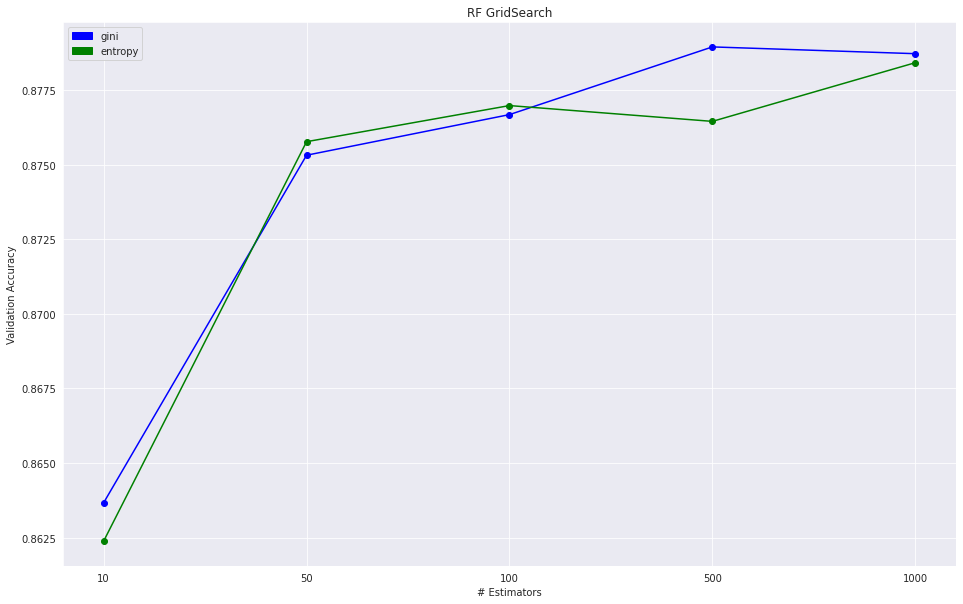

In [ ]:
best_config= RF_CV(X_train, y_train)

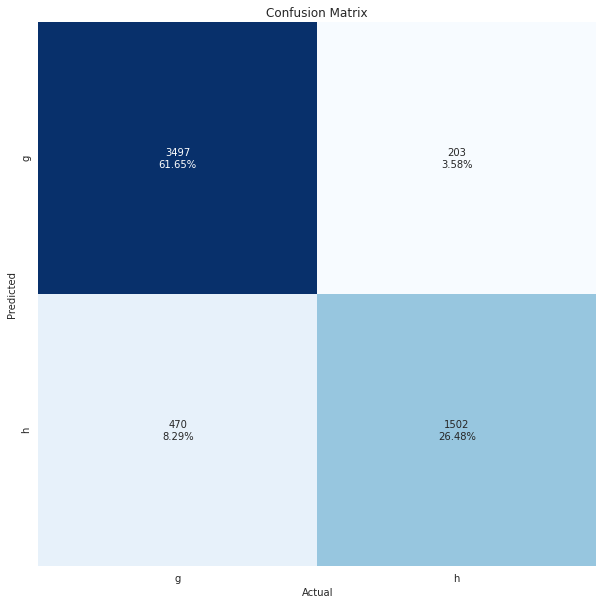

              precision    recall  f1-score   support

           g       0.88      0.95      0.91      3700
           h       0.88      0.76      0.82      1972

    accuracy                           0.88      5672
   macro avg       0.88      0.85      0.86      5672
weighted avg       0.88      0.88      0.88      5672

Accuracy on Test: 88.13%


In [ ]:
RF_Test(best_config, X_train, y_train, X_test, y_test)

With $RF$ we are able to see the benefits mentioned above with respect to $DT$. From the first plot, it is possible to see how as the number of tree increase the performance improves substantially. At the same time, it can be appreciate also how as number of tree, the performance starts to became equal. So, it can be decided to avoid $RF$ with too much tree, in order to avoid incumbents computational time.
The final result is obtain with $GINI$ criterion and $500$ trees and it is equal to $88$%.

## *RF - Standardized Dataset + SMOTE*

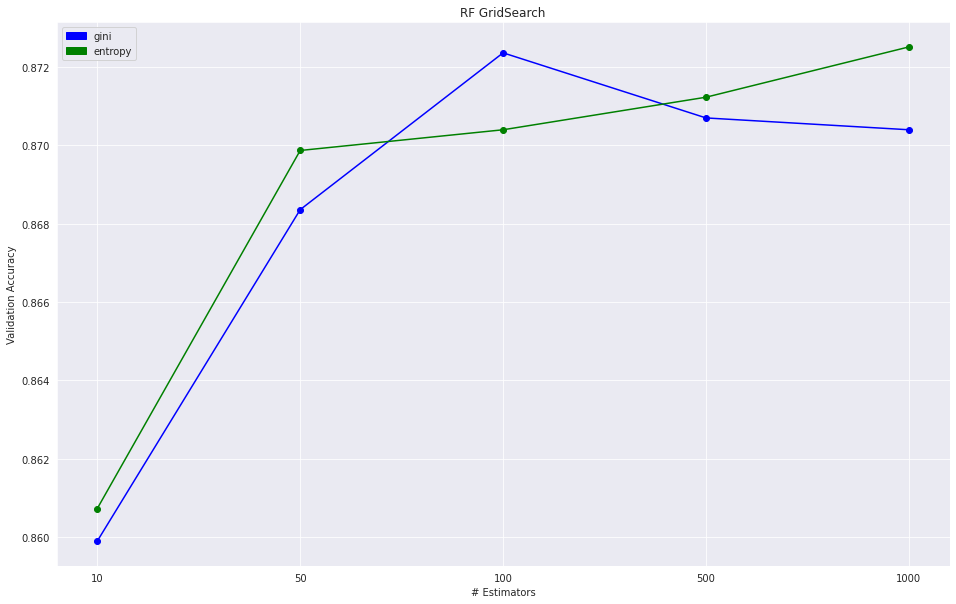

In [ ]:
best_config= RF_CV(X_train, y_train, smote=True)

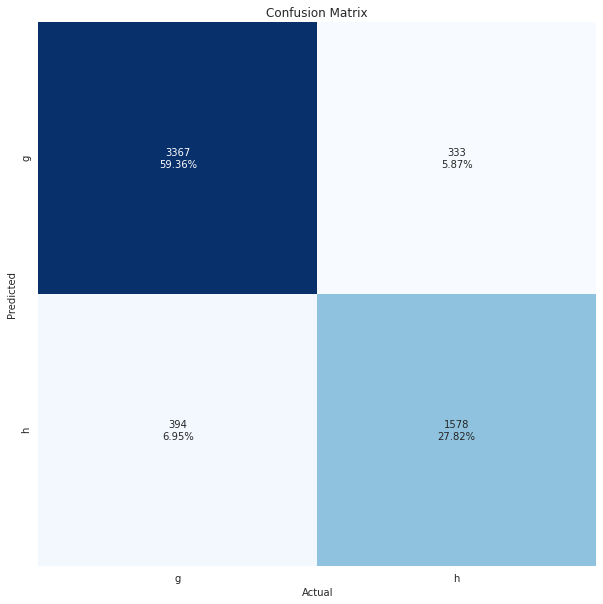

              precision    recall  f1-score   support

           g       0.90      0.91      0.90      3700
           h       0.83      0.80      0.81      1972

    accuracy                           0.87      5672
   macro avg       0.86      0.86      0.86      5672
weighted avg       0.87      0.87      0.87      5672

Accuracy on Test: 87.18%


In [ ]:
RF_Test(best_config, X_train, y_train, X_test, y_test, smote=True)

Here the reasoning is always the same. However, it can be seen how this time the two criterion provide different results with respect to the numbers of tree, so if we want a very good results with a very small computational cost, the $GINI$ split with $50$ trees can be chosen. But, since the goal is to obtain the best possible result, it is chosen the combination of $Entropy$ plus $1000$ trees that makes an accuracy of $87$%.

## *RF - Standardized Dataset + PCA*

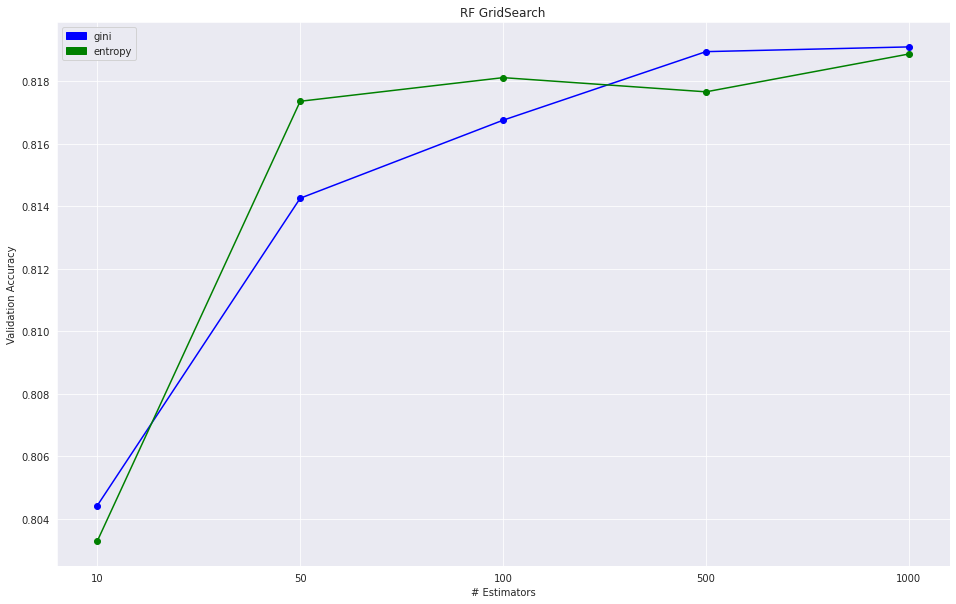

In [ ]:
best_config= RF_CV(X_train_pca, y_train_pca)

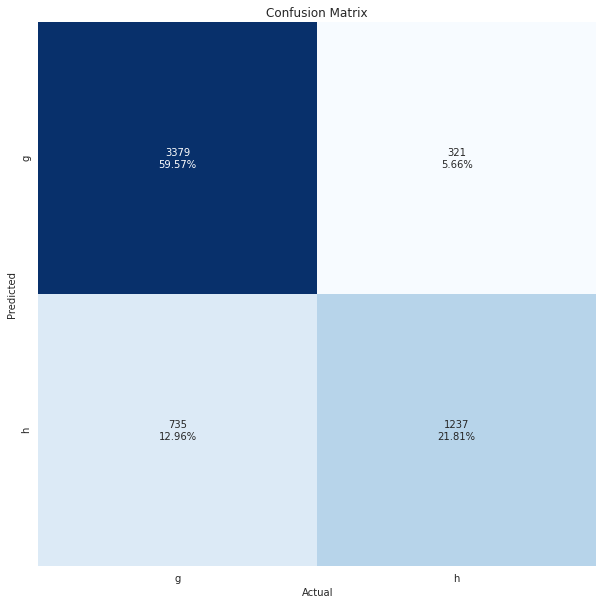

              precision    recall  f1-score   support

           g       0.82      0.91      0.86      3700
           h       0.79      0.63      0.70      1972

    accuracy                           0.81      5672
   macro avg       0.81      0.77      0.78      5672
weighted avg       0.81      0.81      0.81      5672

Accuracy on Test: 81.38%


In [ ]:
RF_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

The trend here is the same as in the first case. As it can be seen, here, like in all algorithms, the PCA generalize too much and important information are lost. The best results is of 81% obtained with $GINI$ and $1000$ trees.

## *RF - Standardized Dataset + PCA + SMOTE*

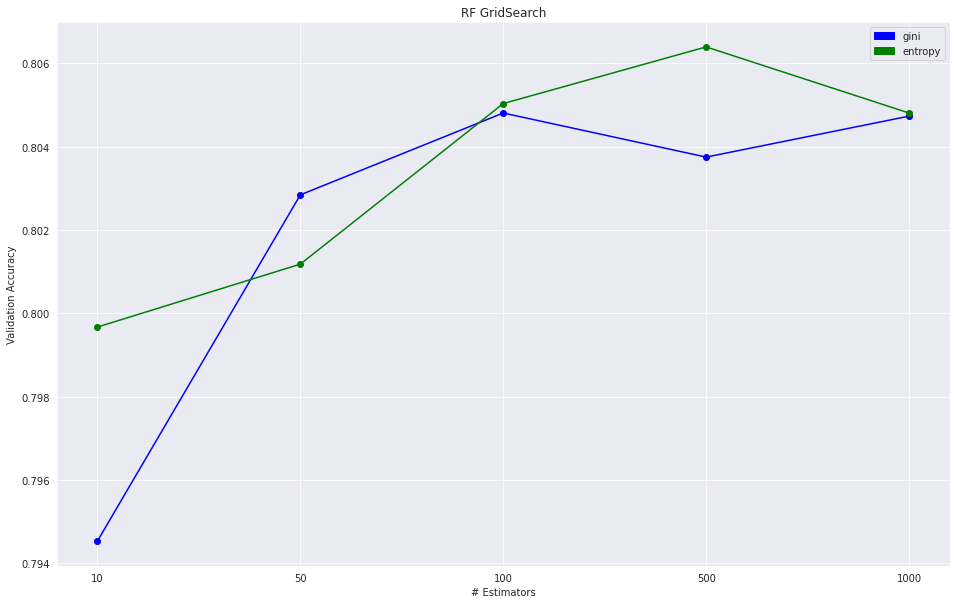

In [ ]:
best_config= RF_CV(X_train_pca, y_train_pca, smote=True)

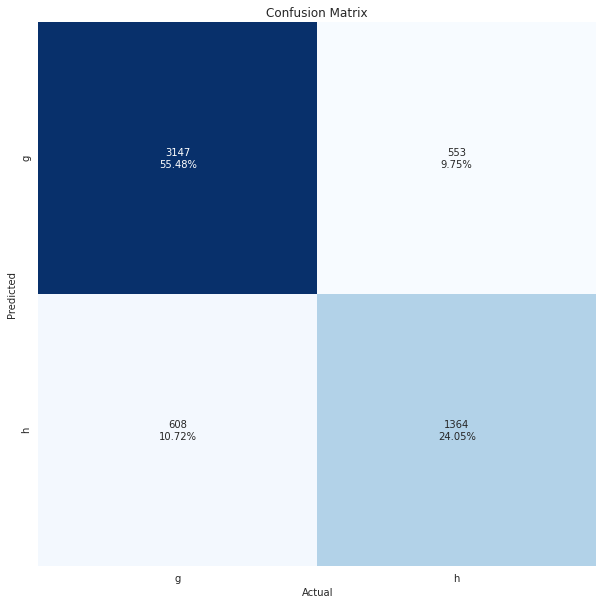

              precision    recall  f1-score   support

           g       0.84      0.85      0.84      3700
           h       0.71      0.69      0.70      1972

    accuracy                           0.80      5672
   macro avg       0.77      0.77      0.77      5672
weighted avg       0.79      0.80      0.79      5672

Accuracy on Test: 79.53%


In [ ]:
RF_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca, smote=True)

By applying the $SMOTE$ to the $PCA$ dataset, the improvement on $h$ are significant as the drop on performance on $g$. The final result is the poorest between all with an accuracy of $79$% done with $500$ and $GINI$.





#**LOGISTIC REGRESSION**

## *A little introduction on Linear Regression*

Before talking about $Logistic$ $Regression$, few words on $Linear$ $Regression$ and why it is not suitable for a binary classification are needed.<br>
$Linear$ $Regression$ is a linear regression in a linear approach to model the relationship between a scalar response and one or more explanatory variables. In the most simple case, the $Simple$ $Linear$ $Regression$ is defined as $Y = \beta_0 + \beta_1X_1 + \epsilon$ where the $\beta_i$ are the coefficients and $\epsilon$ is the error term, that catch all other factors which influence the dependent variable $y$ like not true linear relationship and measurement errors.<br>
Given a dataset, they are the variables of interest inside the model and they are estimated by using the *least squares* criterion.<br> It is based on the concept of measures the *closeness* between an observed response value and its corrispective prediction, and then by applying the $RSS$, are choosen the $\beta_i$ that minimize it.<br>

In the case in which there are more explanatory variable, it is called $Multiple$ $Linear$ $Regression$. The formula now it is expressed as: $Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$ and the $\beta_i$ are computed by following the same reasoning done before.<br>

Overall, in order to perform the $Linear$ $Regression$ some assumptions are needed:
*   **Linearity**: this means that the mean of the response variable is a linear combination of the parameters (regression coefficients) and the predictor variables.
<figure>
  <img src="https://drive.google.com/uc?export=view&id=1Psv8fipNp04cebfYYduZ_PS_VvtxQ60E" width="800" height="400" hspace="0">
  <figcaption>Left: A strong pattern in the residuals indicates non-linearity in the data.Right: There is little pattern in the residuals.</figcaption>
</figure>
If the residual plot indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as $logX$, $\sqrt{X}$, and $X^2$, in the regression model.

*   **homoscedasticity**: different values of the response variable have the same variance in their errors, i.e. $Var(\epsilon_i)=\sigma^2$ is costant, regardless of the values of the predictor variables. However, it is often the case that the variances of the error terms are non-constant. For instance, the variances of the error terms may increase with the value of the response. One can identify non-constant variances in
the errors, or heteroscedasticity, from the presence of a funnel shape in heteroscedathe residual plot. When faced with this problem, one possible solution is to transform
the response Y using a concave function such as $logY$, $\sqrt{Y}$. Such a transformation results in a greater amount of shrinkage of the larger responses, leading to a reduction in heteroscedasticity.
<figure>
  <img src="https://drive.google.com/uc?export=view&id=1L2FXT11r3q376rAwNeFsicxkVaAF2u1a" width="800" height="400" hspace="0">
  <figcaption>Left: The funnel shape
indicates heteroscedasticity. Right: The response has been log transformed, andthere is now no evidence of heteroscedasticity.</figcaption>
</figure>

*   **Independence of errors**: this assumes that the errors $\epsilon$ of the response variables are uncorrelated with each other. Such correlations frequently occur in the context of time series data, which consists of obtime series
servations for which measurements are obtained at discrete points in time. In many cases, observations that are obtained at adjacent time points will have positively correlated errors.
Some methods are capable of handling correlated errors, although they typically require significantly more data unless some sort of regularization is used to bias the model towards assuming uncorrelated errors. Some examples are generalized least squares and Bayesian linear regression

*   **Lack of perfect multicollinearity in the predictors**: for standard least squares estimation methods, the design matrix X must have full column rank p; otherwise, we have a condition known as perfect multicollinearity in the predictor variables. This can be triggered by having two or more perfectly correlated predictor variables. A simple way to detect collinearity is to look at the correlation matrix
of the predictors. An element of this matrix that is large in absolute value indicates a pair of highly correlated variables, and therefore a collinearity problem in the data. Unfortunately, not all collinearity problems can be
detected by inspection of the correlation matrix: it is possible for collinearity to exist between three or more variables, even if no pair of variables has a particularly high correlation. We call this situation multicollinearity.





## *Logistic Regression*

In general, $Linear$ $Regression$ is not appropriate in the case of a qualitative response, since encoding the response variables into quantitative values would implies an ordering on the outcomes and, as consequence, totally different relationship depending on the associations done.<br>
Instead, for a binary (two level) qualitative response, the situation is better. Indeed now with a 0/1 coding, regression by least squares does make sense, since the distance is the same. However, if we use linear regression, some of our estimates might be outside the $[0, 1]$ interval, making them hard to interpret as probabilities. So, here it comes the $Logistic$ $Regression$.

<br>
<figure>
  <img src="https://drive.google.com/uc?export=view&id=1C3nslkJSKSstuprUXUsyY9eKS9t3iWb8" width="800" height="300" hspace="0">
  <figcaption>Left: Estimated probability using linear regression. Some estimated probabilities are negative.<br>
Right: Predicted probabilities of default using logistic regression. All probabilities lie between 0 and 1.</figcaption>
</figure>

Let us try to understand $Logistic$ $Regression$ by considering a logistic model with given parameters, then seeing briefly how the coefficients can be estimated from data. Consider a model with two predictors, $x_1$ and $x_2$, and one binary (Bernoulli) response variable $Y$, which we denote $p=P(Y=1)$.
We assume a linear relationship between the predictor variables and the log-odds (also called logit) of the event that $Y=1$. This linear relationship can be written as following: $l=log(\frac{p}{1-p})=\beta_0+\beta_1x_1+\beta_2x_2$, we an recover the odds by exponenting the log-odds: $\exp^l=\frac{p}{1-p}=\exp^{\beta_0+\beta_1x_1+\beta_2x_2}$.<br>
From this, we can see that $p$ is equal to $\frac{\exp^l}{1+exp^l}$ and in particular can be defined as $S(\beta_0+\beta_1x_1+\beta_2x_2)$, the sigmoid function.<br>
As seen with $Linear$ $Regression$, here the variable of interest are still the $\beta_i$. However, differently from what seen above, these variables are now computed by maximizing the log-likelihood of the Bernoulli.: $l(\beta_0,\beta)=\prod_{i:y_i=1}p(x_i)\prod_{i:y_i=0}(1-p(x_i))$
<br>

Overall, inside the world of $General$ $Linear$ $Model$, the $Logistic$ $Regression$ can be identified:
*   A **response** vector $Y_1,...,Y_n$ of indipendent random variables that follows a $Bernoulli$.

*   A **linear combination** of predictors $\eta_i=\sum_{i=1}^n\beta_jx_{i,j}$. 

*   A **link** function that connect the mean $\mu_i$ and the linear combination represented by the $logit$.



In [ ]:
#@title #####SHOW CODE - LR CV
def LR_CV(X_inn, y_inn,smote=False):
  kf = StratifiedKFold(5)
  final_accuracies = []
  sm = SMOTE(random_state=42)

  params = {
    "C":[0.01,0.1, 1, 10,100]
  }

  for config in ParameterGrid(params):
    clf_accuracies=[]
    #print(config)
    i=0
    for train_indices, valid_indices in kf.split(X_inn, y_inn):
      i+=1
      #print(f"Split {i}")
      X_train=X_inn[train_indices]
      y_train=y_inn[train_indices]
      X_val=X_inn[valid_indices]
      y_val=y_inn[valid_indices]

      if smote:
        X_train, y_train=sm.fit_resample(X_train, y_train)

      clf=LogisticRegression(**config)
      clf.fit(X_train, y_train)
      y_pred=clf.predict(X_val)

      acc=accuracy_score(y_val, y_pred)
      clf_accuracies.append(acc)
    final_accuracies.append(np.average(clf_accuracies))
    #print(np.average(clf_accuracies))

  best_config=list(ParameterGrid(params))[np.argmax(final_accuracies)]

  with sns.axes_style("darkgrid"):
      f=[0.01, 0.1, 1, 10, 100]
      x=[0,1,2,3,4]
      plt.figure(figsize=(16,10))
      #for i in range(0, len(f)):
      plt.plot(x, final_accuracies, 'bo-')
      plt.title(f"LR GridSearch")
      plt.xlabel('C')
      plt.ylabel('Validation Accuracy')
      plt.xticks(np.arange(5),f)
      plt.grid(color='k', ls = '--', lw = 0.25)
      plt.show()

  return best_config

In [ ]:
#@title #####SHOW CODE - LR TEST EVALUTION
def LR_Test(best_config, X_train, y_train, X_test, y_test, smote=False):
  sm = SMOTE(random_state=42)
  if smote:
    X_train, y_train=sm.fit_resample(X_train, y_train)
  bestClassifier=LogisticRegression(**best_config)
  bestClassifier.fit(X_train, y_train)
  y_pred=bestClassifier.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  report=classification_report(y_test, y_pred)
  cm=confusion_matrix(y_test, y_pred)
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=labels,fmt="",cmap="Blues",cbar=False,xticklabels=["g","h"],yticklabels=["g","h"])
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
  print(report)
  print(f"Accuracy on Test: {np.array(acc*100).round(2)}%")

## *LR - Standardized Dataset*

In [ ]:
best_config= LR_CV(X_train, y_train)

NameError: ignored

In [ ]:
LR_Test(best_config, X_train, y_train, X_test, y_test)

As it is shown on the two plots above, the best classifier is obtained with $C=100$, that produce an accuracy on the $Test$ $Set$ equal to $78$% 

## *LR - Standardized Dataset + SMOTE*

In [ ]:
best_config= LR_CV(X_train, y_train, smote=True)

In [ ]:
LR_Test(best_config, X_train, y_train, X_test, y_test, smote=True)

If we compare this results with the model without $SMOTE$, we can see how on the $Test$ $Set$ it is able to predict better the label $h$ that is oversampled with about $+4.5$%. However, at the same time is noticible that there is also a little drop on label $g$ with a $-4.5$%.<br>
At the same time $FP$ is improved, however $FN$ increase by a lot.
So, the overall performaced are balanced with an analogue result of $78$% of accuracy for $C=0.01$.

## *LR - Standardized Dataset + PCA*

In [ ]:
best_config= LR_CV(X_train_pca, y_train_pca)

In [ ]:
LR_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Here instead the best classifier is obtained with  $C=0.1$ , that produce an accuracy on the  $Test$ $Set$ about $78$%.
The main cause of this very tiny drop can be ascribed to an higher level of both $FP$ (predicted $g$ but are $h$ - $+1$%) compared with the $Standard$ model.

## *LR - Standardized Dataset + PCA + SMOTE*

In [ ]:
best_config= LR_CV(X_train_pca, y_train_pca, smote=True)

In [ ]:
LR_Test(best_config, X_train_pca, y_train_pca, X_test_pca, y_test_pca, smote=True)

Finally here the last model, it provides the worst $LR$ result of $77$%. The main issues can be found on an higher $FP$ with the PCA feautures that cause a further drop.

#**CONCLUSION**

At the end, the report of the results in terms of accuracies, reached on the $Test$ $Set$ by the models in the different settings considered.

In [ ]:
#@title #####SHOW CODE - RESULTS COMPARISON
std = [83.96, 78.68, 87.22, 81.82, 88.13, 78.58]
std_smt =  [83.87, 78.7, 86.94, 81.14, 87.18, 78.28]
std_pca = [81.15, 77.72, 82.05, 74.28, 81.38, 77.72]
std_smt_pca = [78.72, 77.94, 80.43, 74.44, 79.53, 77.52]
x = ["KNN", "LinearSVC", "RBF_SVC", "DecisionTree", "RandomForest", "LogisticReg"]

pio.renderers.default = 'colab'
trace1 = dict(
    type='bar',
    x=x,
    y=std,
    text=std,
    textposition='outside',
    name='STD',
    #marker=dict(color='midnightblue')
)
trace2 = dict(
    type='bar',
    x=x,
    y=std_smt,
    text=std_smt,
    textposition='outside',
    name='STD + SMOTE',
    #marker=dict(color='midnightblue')
)
trace3 = dict(
    type='bar',
    x=x,
    y=std_pca,
    text=std_pca,
    textposition='outside',
    name='STD + PCA',
    #marker=dict(color='midnightblue')
)
trace4 = dict(
    type='bar',
    x=x,
    y=std_smt_pca,
    text=std_smt_pca,
    textposition='outside',
    name='STD + SMOTE + PCA',
    #marker=dict(color='midnightblue')
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)

fig.update_yaxes(range=[0, 100])
fig.update_layout(
    title='Results Comparison',
    yaxis=dict(
        title='Accuracy %'
    ),
    width=1050,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.15,
        xanchor="center",
        x=0.5
    )
)
fig.show()

We can notice that:
* In general, with all the models, the best performances are achieved when the fitting is performed on the standardized dataset.

* The best models are $RBF$ $SVC$ (87.22) and $Random$ $Forest$ (88.13).

* In general, we can notice that this dataset is good for its own for classification: applying $PCA$ didn't bring any improvement but only worsening since the important information are lost, in fact we have already an handable number of dimensions and our models are not affected by the unbalance at all, so applying $SMOTE$ lead to a tiny drop in performances.